# Linear Models
### Welcome to the VectorBiTE 2021 section on Linear Models
This section will cover:
* Regression
* ANOVA
* Multiple Explanatory Variables
* Multiple Explanatory Variables with Interactions
* Model Simplification
* General Linear Models (GLM)



# Linear Models: Regression

## Introduction

Linear Regression is a class of [Linear Models](https://en.wikipedia.org/wiki/Linear_model) that is frequently a good choice if both, your response (dependent) and your predictor (independent) variables are continuous. In this section you will learn:

* To *explore* your data in order to determine whether a Linear Model is a good choice by
    * Visualizing your data (in R)
    * Calculating correlations between variables

* To *fit* a Linear Regression Model to data

* To determine whether the Model fits adequately your data (its "significance") by
    * Plotting the data and the fitted Model together
    * Calculating goodness of fit measures and statistics
    * Using diagnostic plots

It is expected that you have already been introduced to, or are familiar with the concepts (and/or theory) underlying Linear Models. If not, you may want to  watch the [video](https://drive.google.com/drive/folders/12Sj56wHX6vcAnp9GE9qQ1gIXbn7QRHU2?usp=sharing).

We will use the genome size data. 

So,

$\star$ Open R and `setwd` to your `code` directory.

$\star$ Create a new blank script called `Regression.R` and add some introductory comments.

$\star$ Add code to your script to load the genome size data into R and check it (again, using the relative path prefix `../`, assuming that you working directory is `code`):

In [71]:
genome <- read.csv('../data/GenomeSize.csv',stringsAsFactors = T) 

head(genome)

,Suborder,Family,Species,GenomeSize,GenomeSE,GenomeN,BodyWeight,TotalLength,HeadLength,ThoraxLength,AdbdomenLength,ForewingLength,HindwingLength,ForewingArea,HindwingArea,MorphologyN
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,Anisoptera,Aeshnidae,Aeshna canadensis,2.20,NA,1,0.159,67.58,6.83,11.81,48.94,45.47,45.40,369.57,483.61,2
2,Anisoptera,Aeshnidae,Aeshna constricta,1.76,0.06,4,0.228,71.97,6.84,10.72,54.41,46.00,45.48,411.15,517.38,3
3,Anisoptera,Aeshnidae,Aeshna eremita,1.85,NA,1,0.312,78.80,6.27,16.19,56.33,51.24,49.47,460.72,574.33,1
4,Anisoptera,Aeshnidae,Aeshna tuberculifera,1.78,0.10,2,0.218,72.44,6.62,12.53,53.29,49.84,48.82,468.74,591.42,2
5,Anisoptera,Aeshnidae,Aeshna umbrosa,2.00,NA,1,0.207,73.05,4.92,11.11,57.03,46.51,45.97,382.48,481.44,1
6,Anisoptera,Aeshnidae,Aeshna verticalis,1.59,NA,1,0.220,66.25,6.48,11.64,48.13,45.91,44.91,400.40,486.97,1


Exploring the data
------------------

We can use `plot` to create a scatterplot between two variables. If you have a set of variables to explore, writing code for each plot is tiresome, so R provides a function `pairs`, which creates a grid of scatter plots between each pair of variables. This will make a plot off all the different combinations in your dataset to better explore the dataset. All it needs is a dataset.

First, plot all pairs:

In [72]:
library(repr); options(repr.plot.res = 100, repr.plot.width = 10, repr.plot.height = 10)

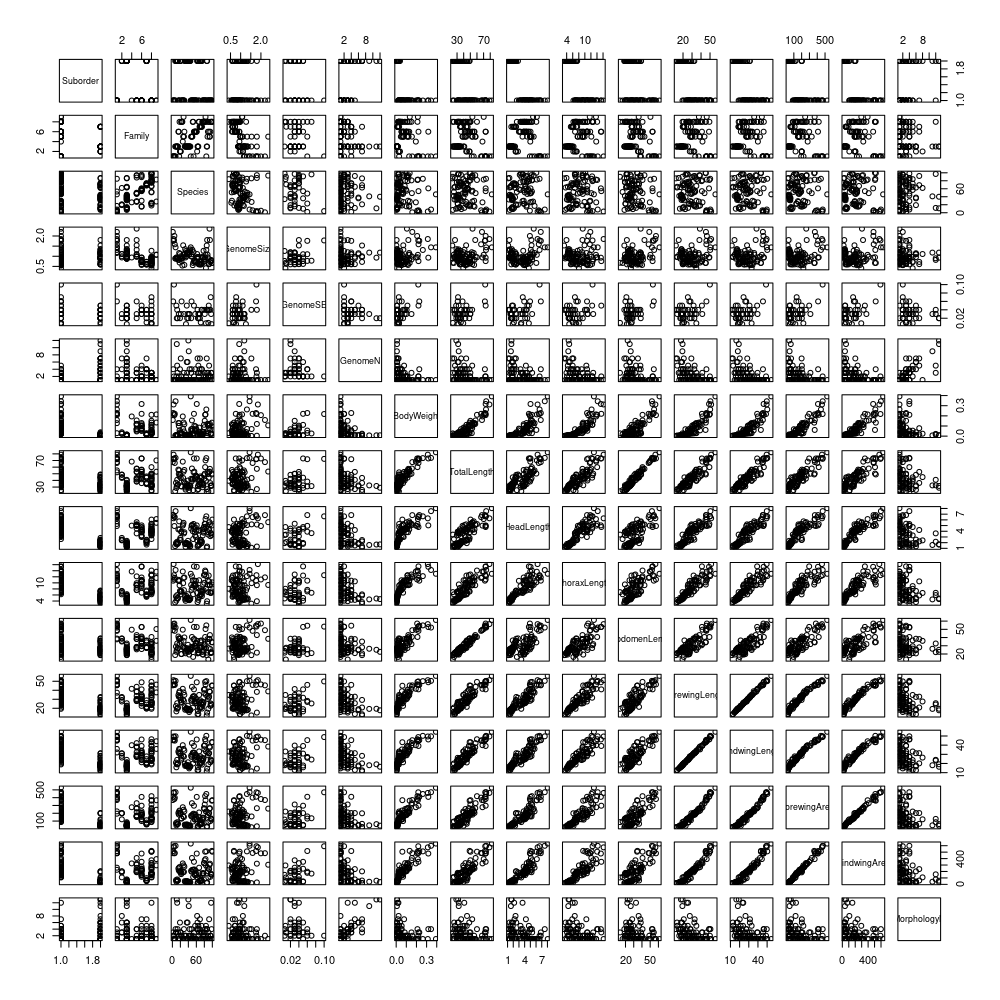

In [73]:
pairs(genome)

That's messy! There are too many columns that we are plotting against each other, so its hard to get a meaningful picture (literally). So let's try color-coding the scatterplot markers by suborder:  

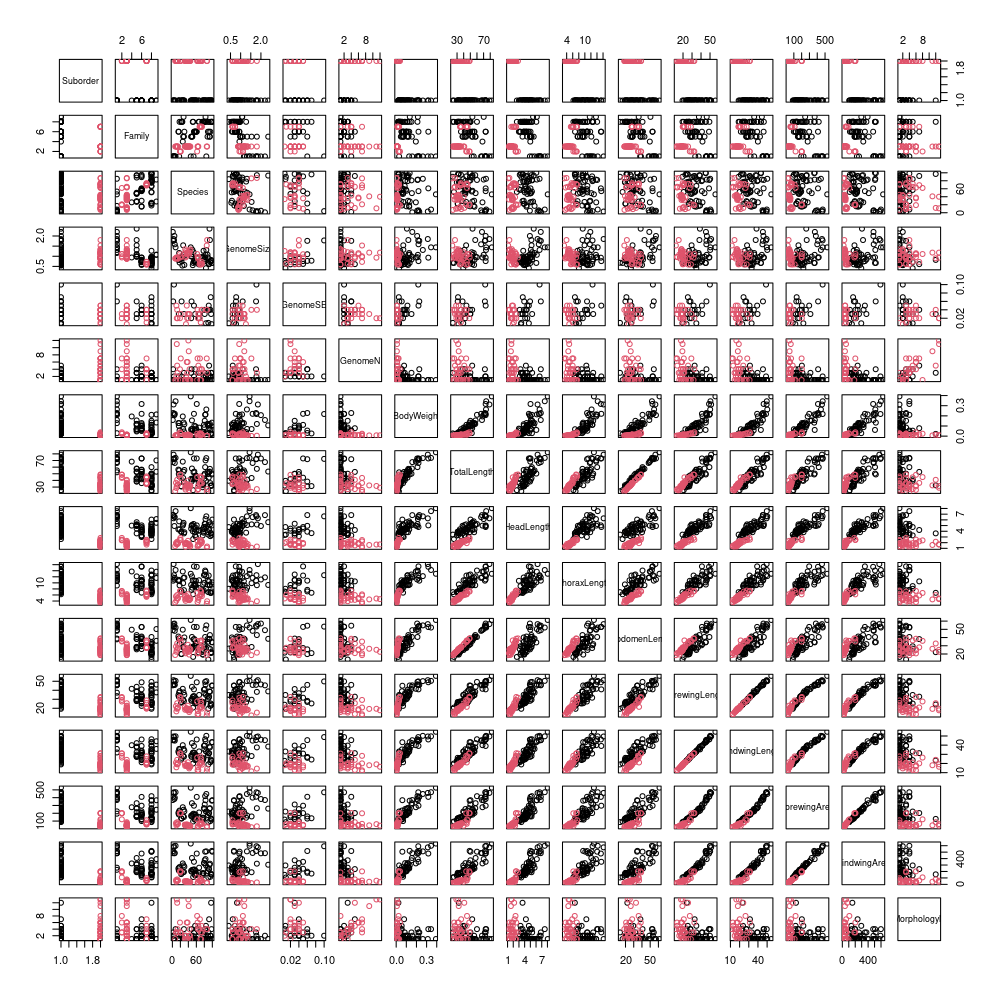

In [74]:
pairs(genome, col=genome$Suborder)

The result is still too messy! There are far too many variables in `genome` for this to be useful. Before we proceed further,

$\star$ Add `pairs(genome, col=genome$Suborder)` into your script and run the code:

So, we need to cut down the data to fewer variables. Previously (Experimental design section) we used indices to select colours; here, we can use indices to select columns from the data frame. This again uses square brackets (`x[]`), but a data frame has two dimensions, rows and columns, so you need to provide an index for each dimension, separated by commas. If an index is left blank, then all of that dimension (i.e. all rows or columns) are selected. Try the following to re-acquaint yourself to access data frame content using indices:

In [99]:
library(repr); options(repr.plot.res = 100, repr.plot.width = 8, repr.plot.height = 8) # change plot size

In [76]:
# create a small data frame:
dat <- data.frame(A = c("a", "b", "c", "d", "e"), B = c(1, 2, 3, 4, 5))
dat[1, ] # select row 1 (all columns selected)

,A,B
,<chr>,<dbl>
1,a,1


In [77]:
dat[, 2] # select column 2 (all rows selected)

[1] 1 2 3 4 5

In [78]:
dat[2, 1] # select row 2, column 1

[1] "b"

Now let's get resume the actual analysis. We will look at five key variables: genome size, body weight, total length, forewing length and forewing area. If you look at the output of `str(genome)`, you'll see that these are in columns 4, 7, 8, 12 and 14. We can record the indices of these columns and use this to select the data in the pairs plot:

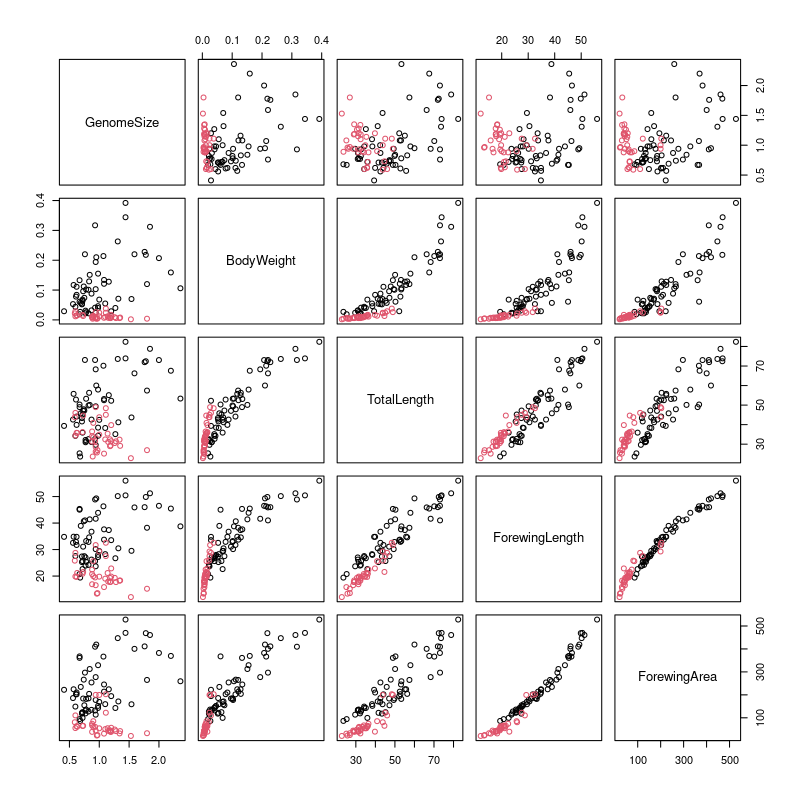

In [100]:
morpho_vars <- c(4, 7, 8, 12, 14) # store the indices
pairs(genome[, morpho_vars], col = genome$Suborder)

$\star$ Add the code above to your script and run it.

In the figure above, each scatterplot is shown twice, with the variables swapping between the $x$ and $y$ axes. You can see immediately that the relationships between the four morphological measurements and genome size are fairly scattered but that the plots comparing morphology show much clearer relationships.

## Correlations

One way of summarising how strong the pair-wise relationships between these variables is to calculate a correlation coefficient. Pearson correlations look at the difference of each point from the mean of each variable (and since it uses means, it is a parametric statistic).

It is calculated using the differences from the mean on each axis. The key calculation is — for each point – to get the product of the differences on each axis and add them up. If the points are mostly top left ($-x$, $y$) or bottom right ($x$, $-y$) then these products are mostly negative ($-xy$); if the points are mostly top right ($x$, $y$) or bottom left ($-x$, $-y$) then the products are mostly positive ($xy$).

---

<img src="./graphics/corr.png" alt="Pearson's Correlation Coefficient" width="800px">

<small> <center> Illustration of what the Pearson correlation coefficient means.
</center> </small>

---

The plots above show three clear cases where all the values of $xy$ are negative or positive or where both are present and sum to zero. The Pearson correlation coefficient simply scales these sums of $xy$ to be between -1 (perfectly negatively correlated) and 1 (perfectly positively correlated) via zero (no correlation). Specifically, this correlation coefficient ($r$) is equal to the average product of the standardized values of the two variables (let's call them $x$ and $y$):

$$r_{xy}={\frac{\sum _{i=1}^{n}\left({\frac {x_{i}-{\bar {x}}}{s_{x}}}\right)\left({\frac {y_{i}-{\bar {y}}}{s_{y}}}\right)}{n-1}}$$

where,

* $n$ is sample size

* $x_i, y_i$ are the individual sample points indexed with $i$ ($i = 1,2,\ldots, n$)

*  $\bar{x} = \frac{\sum_{i=1}^n x_i}{n} $ is the the sample mean.

* $ s_x = \sqrt{ {\frac{\sum_{i=1}^n(x_i - \bar{x})^2}{n-1}}}$ (sample standard deviation)

* The quantities $\left({\frac {x_{i}-{\bar {x}}}{s_{x}}}\right)$ and $\left(\frac{y_i-\bar{y}}{s_y} \right)$ are the Z-scores (aka *standard scores*) of $x$ and $y$. This conversion of the raw scores ($x_i$'s and $y_i$'s) to Z-scores is called standardizing (or sometimes, normalizing).

Thus the coefficient ($r_{xy}$) will be positive (negative) if the $x_i$ and $y_i$'s tend to move in the same (opposite) direction relative to their respective means (as illustrated in the figure above). 
 
In R, we will use two functions to look at correlations. The first is `cor`, which can calculate correlations between pairs of variables, so is a good partner for `pairs` plots. The second is `cor.test`, which can only compare a single pair of variables, but uses a $t$ test to assess whether the correlation is significant.

$\star$ Try the following (and include it in your R script file):

In [80]:
cor(genome[, morpho_vars], use = "pairwise")

,GenomeSize,BodyWeight,TotalLength,ForewingLength,ForewingArea
GenomeSize,1.0000000,0.3430934,0.3407077,0.2544432,0.3107247
BodyWeight,0.3430934,1.0000000,0.9167995,0.8944228,0.9198821
TotalLength,0.3407077,0.9167995,1.0000000,0.9225974,0.9077555
ForewingLength,0.2544432,0.8944228,0.9225974,1.0000000,0.9829803
ForewingArea,0.3107247,0.9198821,0.9077555,0.9829803,1.0000000


This is the correlation matrix. Then:

In [81]:
cor.test(genome$GenomeSize, genome$TotalLength, use = "pairwise")


	Pearson's product-moment correlation

data:  genome$GenomeSize and genome$TotalLength
t = 3.5507, df = 96, p-value = 0.0005972
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1526035 0.5049895
sample estimates:
      cor 
0.3407077 


The `use='pairwise'` tells R to omit observations with missing data and use complete pairs of observations. The first function confirms our impressions from the graphs: the correlations between genome size and morphology are positive but comparatively weak and the correlations between morphological measurements are positive and very strong (i.e. close to 1). The correlation test tells us that genome size and body length are positively correlated (r=0.34, $t$ = 3.5507, df = 96, $p$ = 0.0006). 


Also, in case you are wondering about what the t-value in the `cor.test` signifies:    

The t-test is used within `cor.test` to establish if the correlation coefficient is significantly different from zero, that is, to test if there is a significant association between the two variables. The t-test, in general, can be used to test if the mean of a sample is significantly different from some reference value (1-sample t-test). Here, the "mean of the sample" is the observed correlation coefficient, and the reference value is 0 (the null hypothesis, that there is no association).

## Transformations and allometric scaling

There is one problem with the correlations above: *the correlation coefficient calculation assumes a straight line relationship*. Some of the scatterplots above are fairly straight but there are some strongly curved relationships. This is due to [allometric scaling](https://en.wikipedia.org/wiki/Allometry), where one body measure changes (or grows) disproportionately with respect to another. Here, two of the variables are in linear units (total and forewing length), one is in squared units (forewing area) and one in cubic units (body weight, which is approximately volume). That these measures are in different units itself guarantees that they will scale allometrically with respect to each other. 

The relationships between these variables can be described using a power law: 

$$y = ax^b$$

Fortunately, if we log transform this equation, we get $\log(y) = \log(a) + b \log(x)$. This is the equation of a straight line ($y=a+bx$), so we should be able to make these plots straighter by logging both axes. We can create a new logged variable in the data frame like this:

In [82]:
genome$logGS <- log(genome$GenomeSize)

$\star$ Using this command as a template, create a new logged version of the five
variables listed above:

In [83]:
genome$logGS <- log(genome$GenomeSize)
genome$logBW <- log(genome$BodyWeight)
genome$logTL <- log(genome$TotalLength)
genome$logFL <- log(genome$ForewingLength)
genome$logFA <- log(genome$ForewingArea)

$\star$ Then, using `str`, work out which column numbers the logged variables are and create a new variable called `logmorpho` containing these numbers:

In [84]:
str(genome)

'data.frame':	100 obs. of  21 variables:
 $ Suborder      : Factor w/ 2 levels "Anisoptera","Zygoptera": 1 1 1 1 1 1 1 1 1 1 ...
 $ Family        : Factor w/ 9 levels "Aeshnidae","Calopterygidae",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Species       : Factor w/ 100 levels "Aeshna canadensis",..: 1 2 3 4 5 6 8 17 46 53 ...
 $ GenomeSize    : num  2.2 1.76 1.85 1.78 2 1.59 1.44 1.16 1.44 1.2 ...
 $ GenomeSE      : num  NA 0.06 NA 0.1 NA NA NA NA NA NA ...
 $ GenomeN       : int  1 4 1 2 1 1 1 1 1 1 ...
 $ BodyWeight    : num  0.159 0.228 0.312 0.218 0.207 0.22 0.344 0.128 0.392 0.029 ...
 $ TotalLength   : num  67.6 72 78.8 72.4 73 ...
 $ HeadLength    : num  6.83 6.84 6.27 6.62 4.92 6.48 7.53 5.74 8.05 5.28 ...
 $ ThoraxLength  : num  11.8 10.7 16.2 12.5 11.1 ...
 $ AdbdomenLength: num  48.9 54.4 56.3 53.3 57 ...
 $ ForewingLength: num  45.5 46 51.2 49.8 46.5 ...
 $ HindwingLength: num  45.4 45.5 49.5 48.8 46 ...
 $ ForewingArea  : num  370 411 461 469 382 ...
 $ HindwingArea  : num  484 517 574

In [85]:
logmorpho <- c(17,18,19,20,21)

We can now use the `pairs` and `cor` test as before for the columns in `logmorpho`:

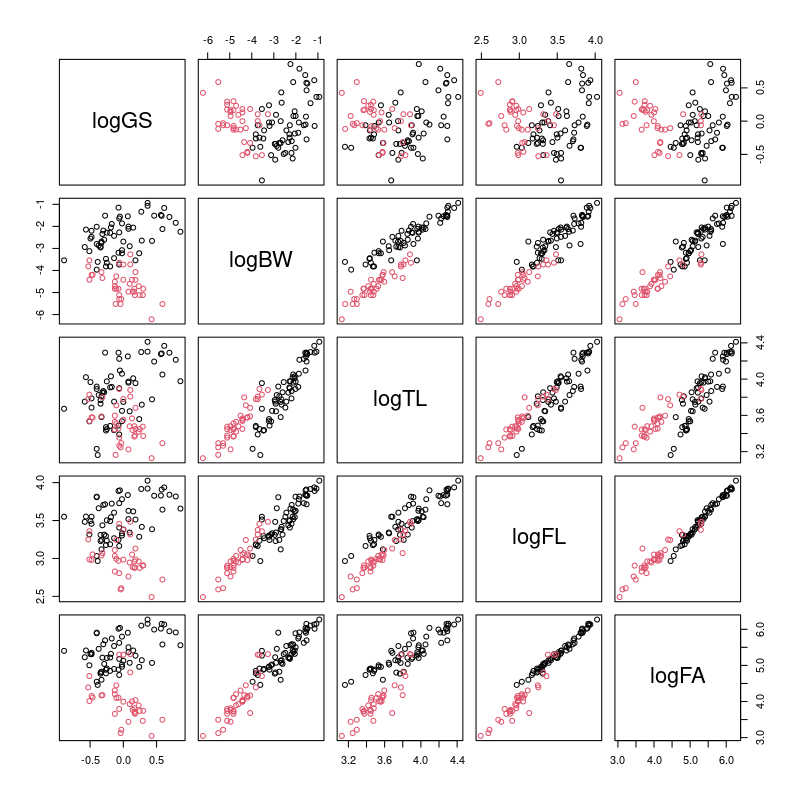

In [101]:
pairs(genome[, logmorpho], col=genome$Suborder)

In [87]:
cor(genome[, logmorpho], use='pairwise')

,logGS,logBW,logTL,logFL,logFA
logGS,1.00000000,0.08406293,0.2224443,0.1150025,0.06808306
logBW,0.08406293,1.00000000,0.8891899,0.9456492,0.94995683
logTL,0.22244431,0.88918989,1.0000000,0.9157695,0.86207098
logFL,0.11500250,0.94564919,0.9157695,1.0000000,0.97916470
logFA,0.06808306,0.94995683,0.8620710,0.9791647,1.00000000


The scatterplots show that logging the data has very successfully addressed curvature (non-linearity) due to allometric scaling between variables in the data.

## Performing the Regression analysis

We'll now look at fitting the first linear model of this course, to explore whether log genome size explains log body weight. The first thing to do is to plot the data:

In [88]:
myColours <- c('red', 'blue') # Choose two colours
mySymbols <- c(1,3) # And two different markers
colnames(genome)

[1] "Suborder"       "Family"         "Species"        "GenomeSize"    
 [5] "GenomeSE"       "GenomeN"        "BodyWeight"     "TotalLength"   
 [9] "HeadLength"     "ThoraxLength"   "AdbdomenLength" "ForewingLength"
[13] "HindwingLength" "ForewingArea"   "HindwingArea"   "MorphologyN"   
[17] "logGS"          "logBW"          "logTL"          "logFL"         
[21] "logFA"

In [115]:
library(repr); options(repr.plot.res = 100, repr.plot.width = 6, repr.plot.height = 6) # change plot size

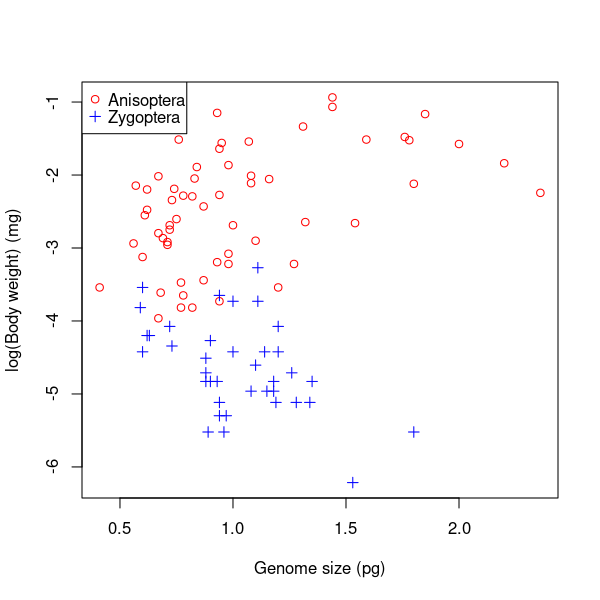

In [116]:
plot(logBW ~ GenomeSize , data = genome, #Now plot again
col = myColours[Suborder], pch = mySymbols[Suborder],
xlab='Genome size (pg)', ylab='log(Body weight) (mg)')

legend("topleft", legend=levels(genome$Suborder), #Add legend at top left corner
       col= myColours, pch = mySymbols)

It is clear that the two suborders have very different relationships: to begin with we will look at dragonflies (Anisoptera). We will calculate two linear models:

* **The Null Model**:  This is the simplest linear model: nothing is going on and the response variable just has variation around the mean: $y = \beta_1$. This is written as an R formula as `y ~ 1`.

* **The Linear (Regression) Model**: This models a straight line relationship between the response variable and a continuous explanatory variable: $y= \beta_1 + \beta_{2}x$.

The code below fits these two models.

In [114]:
nullModelDragon <- lm(logBW ~ 1, data = genome, subset = Suborder ==  "Anisoptera")
genomeSizeModelDragon <- lm(logBW ~ logGS, data = genome, subset =  Suborder == "Anisoptera")

* Note the long names for the models. Short names are easier to type but calling R objects names like `mod1`, `mod2`, ` xxx` swiftly get confusing!*

$\star$ Add these model fitting commands into your script and run them.

Now we want to look at the output of the model. Remember from the lecture that a model has *coefficients* (the $\beta$ values in the equation of the model) and *terms* which are the
explanatory variables in the model. We'll look at the *coefficients* first:

In [91]:
summary(genomeSizeModelDragon) 


Call:
lm(formula = logBW ~ logGS, data = genome, subset = Suborder == 
    "Anisoptera")

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3243 -0.6124  0.0970  0.5194  1.3236 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.39947    0.09085 -26.413  < 2e-16 ***
logGS        1.00522    0.23975   4.193 9.54e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6966 on 58 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.2326,	Adjusted R-squared:  0.2194 
F-statistic: 17.58 on 1 and 58 DF,  p-value: 9.539e-05


There is a lot of information there: the model description ('`Call`'), a summary of the residuals, a table of coefficients and then information on residual standard error, r squared and an $F$ test.

All of these will become clearer during this course (in particular, the meaning of Adjusted R-square will be explained in the ANOVA section — for the moment, concentrate on the coefficients table.

There are two rows in the coefficient table, one for each coefficient in $y=\beta_1 + \beta_2x$ — these are the intercept and the slope of the line. The rest the details on each row are a $t$ test of whether the slope and intercept are significantly different from zero.

The (least-squares) estimate of the slope coefficient (`logGS`) is equal to the correlation coefficient between the dependent variable ($y$, here `logBW`) and the independent variable ($x$, here `logGS`) times the ratio of the (sample) standard deviations of the two (see [above](#Correlations) for the definitions of these):

$$ \text{Slope} = \beta_2 = r_{xy} \frac{s_y}{s_x}$$

Thus you can see that the regression slope is proportional to the correlation coefficient; the ratio of standard deviations serves to scale the correlation coefficient (which is unit-less) appropriately to the actual units in which the variables are measured.  

The (least-squares) estimate of the intercept is the mean of the dependent variable minus the estimated slope coefficient times the mean of the independent variable:

$$ \text{Intercept} = \beta_1 = \bar{y} - \beta_2 \bar{x}  $$

The standard error of the model ("Residual standard error" in the output above, also referred to as the standard error of the regression) is equal to the square root of the sum of the squared residuals divided by $n-2$. The sum of squared residuals is divided by $n-2$ in this calculation rather than $n-1$ because an additional degree of freedom for error has been used up by estimating two parameters (a slope and an intercept) rather than only one (the mean) in fitting the model to the data. 

As you can see in the output above, each of the two model parameters, the slope and intercept, has its own standard error, and quantifies the uncertainty in these two estimates. These can be used to construct the Confidence Intervals around these estimates, which we will learn about later.  

The main take-away from all this is that the standard errors of the coefficients are directly proportional to the standard error of the regression and inversely proportional to the square root of the sample size ($n$). Thus, that "noise" in the data (measured by the residual standard error) affects the errors in the coefficient estimates in exactly the same way. Thus, 4 times as much data will tend to reduce the standard errors of the all coefficients by approximately a factor of 2.

Now we will look at the *terms* of the model using the `anova` function. We will have a proper look at ANOVA (Analysis of Variance) later. 

Meanwhile, recall from your lecture that ANOVA tests how much variation in the response variable is explained by each explanatory variable. We only have one variable and so there is only one row in the output:

In [92]:
anova(genomeSizeModelDragon)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
logGS,1,8.52939,8.5293897,17.57907,9.538946e-05
Residuals,58,28.14168,0.4852014,NA,NA


This table is comparing the variation in log body weight explained by log genome size to the total variation in log body weight. We are interested in how much smaller the residuals are for the genome size model than the null model. Graphically, how much shorter are the red residuals than the blue residuals:



---

<img src="./graphics/regResid.png" width = "500px">

<small><br> <center>Comparison of the null and the regression models.</center></small>

---

We can get the sums of the squares of these residuals from the two models using the function `resid`, and then square them and add them up:

In [93]:
sum(resid(nullModelDragon) ^ 2)

[1] 36.67107

In [94]:
sum(resid(genomeSizeModelDragon) ^ 2)

[1] 28.14168

So we have five columns in the ANOVA table:

* **`Df`**: This shows the degrees of freedom. Each fitted parameter/coefficient takes up a degree of freedom from the total sample size, and the left over are the residuals degree of freedom. In this case, genome size adds a slope (compare the null model $y=\beta_1$ and this model $y=\beta_1 + \beta_2x$ — there is one more $\beta$).

* **`Sum Sq`**: This shows sums of squares. The bottom line is the residual sum of squares for the model and the one above is the variation explained by genome size. Using the two values from above, the sums of square residuals for the null model are 36.67. In the genome size model, the sum of square residuals are 28.14 and so $36.67-28.14=8.53$ units of variance have been explained by this model.

* **`Mean Sq`**: These are just the Sum Sq (Sum of Squares) values divided by the degrees
of freedom. The idea behind this is simple: if we explain lots of variation with one coefficient, that is good (the null model), and if we explain a small amount of variation with a loss of degree of freedom (by adding and then estimating more parameters), then that is bad.

* **`F value`**: This is the ratio of the Mean Sq for the variable and the residual Mean
Sq. This is used to test whether the explained variation is large or small.

* **`Pr(>F)`**: This is the $p$ value — the probability of the x-variable (the fitted model) explaining this much variance by chance.

In this case, it is clear that genome size explains a significant variation in body weight.

$\star$ Include the `summary` and `anova` commands for `genomeSizeModelDragon` in your script, run them and check you are happy with the output.

### Exercise 

Using the above code as a template, create a new model called `genomeSizeModelDamsel` that fits log body weight as a function of log genome size for damselflies. Write and run code to get the `summary` and `anova` tables for this new model. For example, the first step would be:

In [95]:
genomeSizeModelDamsel <- lm(logBW ~ logGS, data=genome,subset=Suborder=='Zygoptera')

### Plotting the fitted Regression model

Now we can plot the data and add lines to show the models. For simple regression models, we can use the function `abline(modelName)` to add a line based on the model.

$\star$ Create a scatterplot of log body weight as a function of log genome size, picking your favourite colours for the points.

Use `abline` to add a line for each model and use the ` col` option in the function to colour each line to match the points. 

For example: `abline(genomeSizeModelDragon, col='red')`.

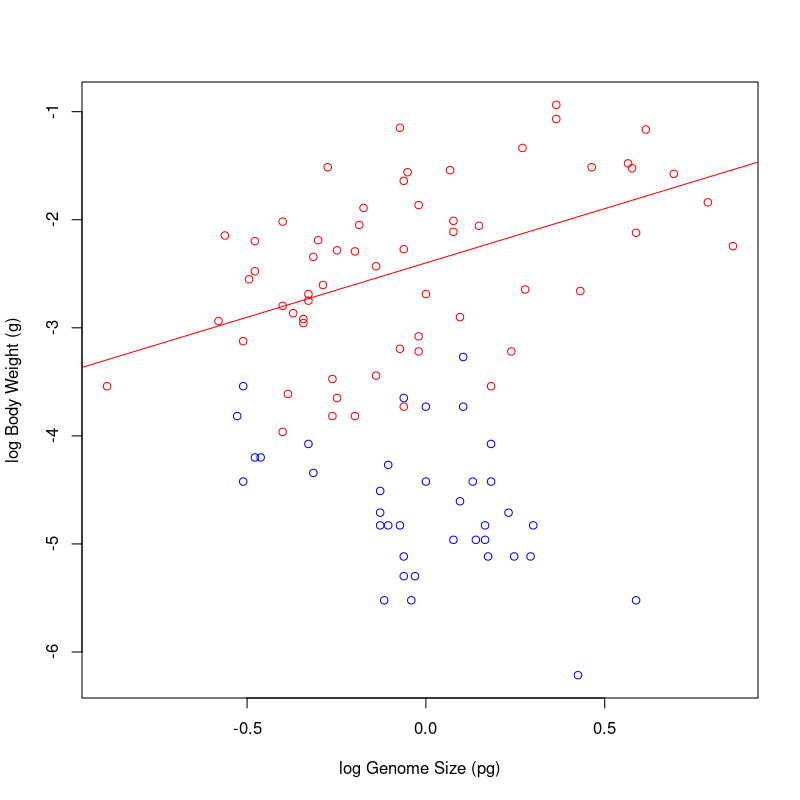

In [117]:
myCol <- c('red','blue')
library(repr); options(repr.plot.res = 100, repr.plot.width = 8, repr.plot.height = 8) # change plot size
plot(logBW ~ logGS, data=genome, col=myCol[Suborder], xlab='log Genome Size (pg)', ylab='log Body Weight (g)')

abline(genomeSizeModelDragon, col='red')

Your final figure should look something like this:

<img src="./graphics/GenoRegModels.png" width="300px">

<small> <center> Linear regression models fitted to the body weight vs. genome size to the Dragonfly (red) and Damselfly (blue) subsets of the data.
</center></small>

## Model diagnostics

Now that we have our models, we need to check that they are appropriate for the data. For this, we will inspect "diagnostic plots". Producing diagnostic plots is easy in R — if you `plot` the model object, then R produces a set of diagnostic plots!

$\star$ Quick note on [par](https://www.rdocumentation.org/packages/graphics/versions/3.6.2/topics/par): this is used to tell R where you want your plots when you build. 

$\star$ Try the following code (and include in the R script file):

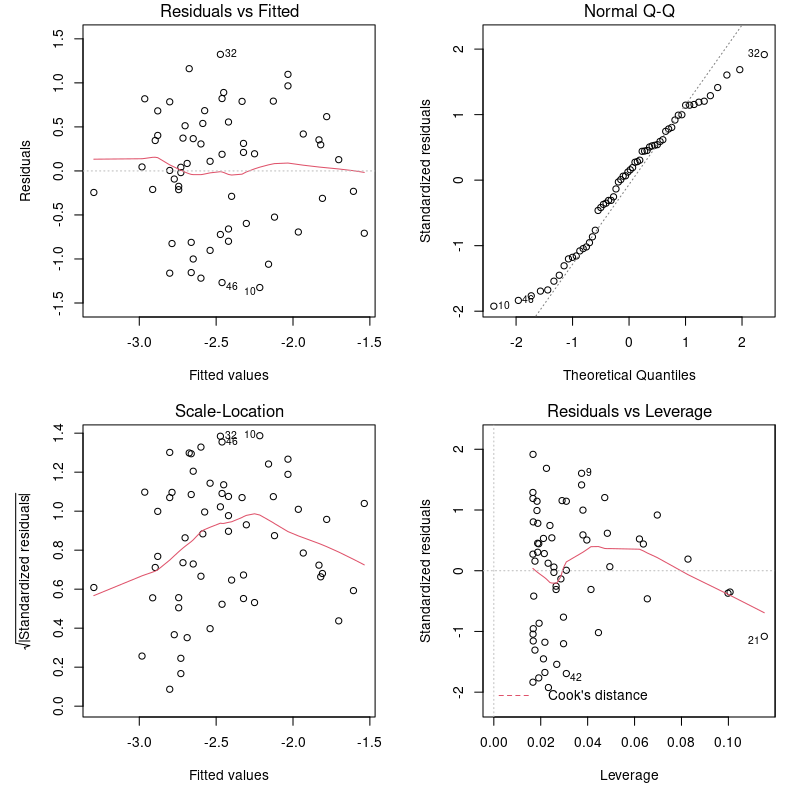

In [118]:
par(mfrow = c(2, 2), mar = c(5, 5, 1.5, 1.5))
plot(genomeSizeModelDragon)

These are the diagnostics for the `lm` fit to the Dragonfly data subset.

Let's also plot the diagnostic pots for the model fitted to the Damselfly subset:    

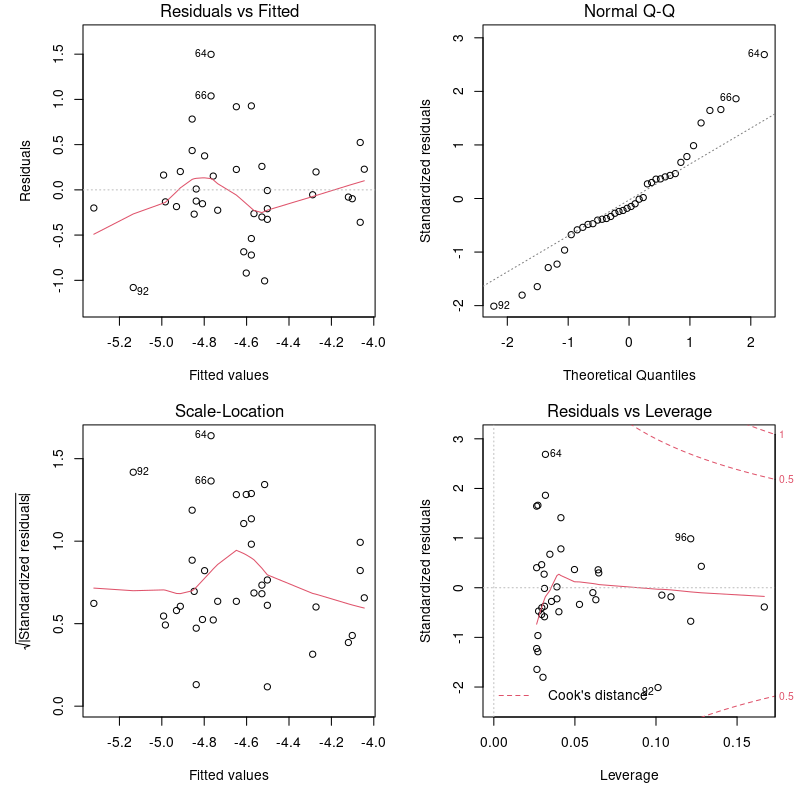

In [111]:
par(mfrow = c(2, 2), mar = c(5, 5, 1.5, 1.5))
plot(genomeSizeModelDamsel)

The diagnostic plots are:

* **Residuals vs Fitted**: This plot is used to spot if the distribution of the residuals (the vertical distance from a point to the regression line) has *similar variance* for different predicted values (the y-value on the line corresponding to each x-value). There should be no obvious patterns (such as curves) or big gaps. If there was no scatter, if all the points fell exactly on the line, then all of the dots on this plot would lie on the gray horizontal dashed line. The red line is a smoothed curve to make it easier to see trends in the residuals. It is flat in the Dragonfly model fit above, and a bit more wavy than we would like in the in the Damselfly model fit, but there are no clear trends in either, which is what you hope to see.

* **Normal Q–Q**: This plot is to check whether the residuals are *normally distributed* — are the values of the observed residuals similar to those expected under a normal distribution? Ideally, the points should form a perfectly straight line, indicating that the observed residuals exactly match the expected. Here, note that the points lie pretty close to the dashed line in both sets of diagnostic Figures above, but deviate at the ends, especially for Damselflies. However, some deviation is to be expected near the ends — here these deviations are just about acceptable.

* **Scale–Location**: The x-axis on this plot is identical to the Residuals vs Fitted plot – these are the fitted values. The y-axis is the square root of the *standardized residuals*, which are residuals rescaled so that they have a mean of zero and a variance of one. As a result, all y-axis values are positive. Thus large residuals (both positive and negative) plot at the top, and small residuals plot at the bottom (so only their *scale* is retained). Thus, all of the numbered points (which will be the same in all plots) plot at the top here. The red line here shows the trend, just like the Residuals vs Fitted plot. The regression analysis has assumed homoscedasticity, that the variance in the residuals doesn't change as a function of the predictor. If that assumption is correct, the red line should be relatively flat. It is not quite as flat as we would like, especially for the Dragonfly analysis.

* **Residuals vs Leverage**: This plot shows the standardized residuals against leverage. "Leverage" is a measure of how much each data point influences the linear model's coefficient estimates. Because the regression line must pass through the centroid ("pivot point") of the data, points that lie far from the centroid have greater leverage, and their leverage increases if there are fewer points nearby. Here is an illustration:

---

<img src="./graphics/Leverage.png" width = "250px">

<small> <center> Leverage of data points on slope of a regression. The points further away from the centroid in the x-axis direction have more leverage, and
can therefore move the regression line up or down (dashed red lines)
</center> </small>

There are two key things to note about this plot:

1. The standardized residuals (y-axis) are centered around zero and reach 2-3 standard deviations away from zero. They should also lie symmetrically about zero, as would be expected for a normal distribution. This is the case for the Damselfly plot , but not so much for the Dragonfly plot.

2. The contours values show *Cook's distance* (only visible in the Damsefly plot), which measures how much the regression would change if a point was deleted. Cook's distance is increased by leverage and by large residuals: a point far from the centroid with a large residual can severely distort the coefficient estimates from the regression. On this plot, you want to see that the red smoothed line stays close to the horizontal gray dashed line and that no points have a large Cook's distance (i.e, &gt;0.5). Both are true here.

This is an important diagnostic plot in regression analyses in particular because it tells you whether your estimate of the slope coefficient in particular is strongly affected by certain data points.

Note that certain points are numbered in all the diagnostic plots — these are points to pay special attention to because they are *potential* outliers. The numbers correspond to the row number for that dataset in your data frame. You can easily identify these points in your data plot because the order of the points along the fitted values axis (y-axis) in the diagnostic plot matches the order along the x-axis in the data plot. So, for example here, in the dragonfly diagnostic plots the two numbered points (46, 10) near the bottom correspond in the data plot to the two red points near the center-left that lie farthest below the red line (see the plot with regression lines fitted to the data).

Thus, neither the Drangonfly nor the Damselfly diagnostic plots look perfect, but this level of deviation from assumptions of linear models is acceptable. The main worrying factors are that the Q-Q plot for Damselflies indicates the observed residuals are a bit more extreme than expected, and the Scale–Location plot for Dragonflies suggests some pattern in the standardized residuals wrt location of the fitted values.

$\star$ Copy the code to create the diagnostic plots into your script to keep a
record of the code and run it.

## Reporting the model

Now we know that the models are appropriate and we have a plot, the last thing is to report the statistics. For the damselfly model, here is one summary that would do: log genome size explains significant variation in log body weight in dameselflies (F=10.5, df=1,36, p=0.0025) and shows that body weight decreases with genome size (intercept: -4.65, se=0.09;
slope: -1.14, se=0.35).

# Linear Models: Analysis of variance

## Introduction

Analysis of Variance, is very often a good choice if your response (dependent) variable is continuous, and your  predictor (independent) variables is categorical. 

In this section, you will learn to perform an ANOVA, that is, fit this linear model to the data. Specifically, you will learn to[$^{[1]}$](#fn1):

* Visualize the data by plotting boxplots and barplots

* Fit an ANOVA to test whether certain factors can explain (partition) the variation in your data

* Perform diagnostics to determine whether the factors are explanatory, and whether the Linear Model is appropriate for your data

* Explore and compare how much the different levels of a factor explain the variation in your data 


## What is ANOVA?

<u>An</u>alysis  <u>O</u>f  <u>Va</u>riance (ANOVA) is an extremely useful class of Linear models. It is very often appropriate when your response (dependent) variable is continuous, while your predictor (independent) variable is categorical. Specifically, *One-way ANOVA* is used to compare means of two or more samples representing numerical, continuous data in response to a single categorical variable (factor).

<img src="./graphics/ANOVA_is_LM.png" alt="ANOVA example" width="300px">

<small><center>A dataset where an ANOVA is appropriate.
     <br>
Performing an ANOVA on this dataset is the same as fitting the linear model $y  = \beta_1  + \beta_2 x_s + \beta_3 x_a$, where $x_s$ and $x_a$ are two levels ("treatments", representing statistically separate populations) within the factor (games console ownership). Here, the first treatment, the control, is captured by the baseline value $\beta_1$ (the sample with the lowest value, on the far left).
</center> </small>

(One-way) ANOVA tests the null hypothesis that samples from two or more groups (the treatments or factors) are drawn from populations with the *same mean value*. That is, the null hypothesis is that all the groups are random samples from the *same* population (no statistical difference in their means). To do this, ANOVA compares the variance in the data explained by fitting the linear model, to the unexplained variance (the null hypothesis. 

In other words, in effect, ANOVA asks whether a linear model with a predictor (or explanatory variable) with at least two categorical levels (or factors), better accounts for the variance (Explained Sum of Squares, ESS, see below) than a null model of the form $y  = \beta_1$. Thus, ANOVA is just a type of linear model.

By the end of this section, it will also make more sense to you how/why fitting a linear regression model to the data of the form $y = \beta_1  + \beta_2 x$ (where $x$ is a continuous predictor variable), requires an ANOVA to determine if the model better fits than a null model of the form $y  = \beta_1$.

Typically, one-way ANOVA is used to test for differences among at least three groups, since the two-group (or levels or factors) case can be covered by a $t$-test. When there are only two means to compare, the $t$-test and the F-test are equivalent; the relation between ANOVA and t is given by $F = t^2$.

An extension of one-way ANOVA is two-way analysis of variance that examines the influence of two different categorical independent variables on one dependent variable. We will explore multiple predictors in later segments.


## Calculating the ANOVA test statistic

ANOVA uses the [F-Statistic](https://blog.minitab.com/en/adventures-in-statistics-2/understanding-analysis-of-variance-anova-and-the-f-test#:~:text=The%20F%2Dstatistic%20is%20the,F%2Dstatistic%20of%20approximately%201.&text=In%20order%20to%20reject%20the,need%20a%20high%20F%2Dvalue.). To this end, an ANOVA "partitions" variability in your data as follows:

**Total sum of squares (TSS)**: This is the sum of the squared difference between the observed dependent variable ($y$) and the mean of the response variable $y$ (denoted by $\bar{y}$), i.e.,

$$\text{TSS} = \sum_{i=1}^{n}(y_i - \bar{y})^2$$

TSS tells us how much variation there is in the dependent variable without having any other information (your null model). You might notice that TSS is the numerator of the *sample variance* (or it's square-root, the *sample standard deviation*).


**Explained sum of squares (ESS)**: Sum of the squared differences between the predicted $y$'s (denoted $\hat{y}$'s) and $\bar{y}$, or,
$$\text{ESS} = \sum_{i=1}^{n} (\hat{y}_i - \bar{y})^2$$ 
ESS tells us how much of the variation in the dependent variable our alternative (linear) model was able to explain. That is, it's the reduction in uncertainty that occurs when the linear model is used to predict the responses.


**Residual sum of squares (RSS)**: Sum of the squared differences between the observed $y$'s (denoted by $y_i$) and the predicted $\hat{y}$, or,
$$\text{RSS} = \sum_{i=1}^{n} (\hat{y}_i - y_i)^2$$ 
RSS tells us how much of the variation in the dependent variable our model could not explain. That is, it's the uncertainty that remains even after the linear model is used. The linear model is considered to be statistically significant if it can account for a large amount of variability in the response.

* And of course, TSS = ESS + RSS. That is, the OLS method "decomposes" the total variation in the dependent variable into an explained component (ESS; explained by the predictor) and an unexplained or residual component (the RSS).

The sums of squares used to calculate the statistical significance of the linear model (Regression, ANOVA, etc) through the F value are as follows:

|Type of Sum of Squares (SS)| SS Calculation | Degrees of Freedom (DF)|Mean Sum of Squares (MSS) | 
|:------|:------:|:------:|:------:|
|TSS | $\sum_{i=1}^{n}(y_i - \bar{y})^2$ | $n-1$ | $\frac{TSS}{n-1}$ |
|ESS | $\sum_{i=1}^{n} (\hat{y}_i - \bar{y})^2$ | $n_c-1$ | $\frac{ESS}{n_c-1}$ |
|RSS | $\sum_{i=1}^{n} (\hat{y}_i - y_i)^2$ | $n-n_c$ |$\frac{RSS}{n-n_c}$ |

Let's try to make sense of these calculations. Firstly, because we are dealing with samples understanding the degrees of freedom is critical. 

### Degrees of freedom

Each sum of squares has a corresponding degrees of freedom (DF) associated with it that gives the Mean Sum of Squares (MSS) — the Sums of Squares divided by the corresponding degrees of freedom.

* The TSS DF is one less than the number of observations $n-1$. This is because calculating TSS, needs $\bar y$ , which imposes loss of one degree of freedom. Note that MSS is thus nothing but the sample variance.

* The ESS DF is one less than the number of coefficients ($n_c$) (estimated parameters) in the model: $n_c-1$. Note that in the case where the linear model is an ANOVA, the number of coefficients equals the number of "treatments" (the categories or levels in the predictor or factor). So for example, in [Figure 1](#fig:anova1), there are three treatments (predictors) and therefore three coefficients ($\beta_1$, $\beta_2$, $\beta_3$), which means that the ESS degrees of freedom there is $n_c-1 = 2$.

* The RSS DF is the sample size $n$ minus the number of coefficients that you need to estimate ($n_c$), that is, $n - n_c$, because each estimated coefficient is an unknown parameter. 

### The F-Value (or Ratio)

The F-Value or F-Ratio, the test statistic used to decide whether the linear model fit is statistically significant, is the ratio of the Mean ESS to the Mean RSS: 

$$
F = \frac{\left(\frac{ESS}{n_c-1}\right)}{\left(\frac{RSS}{n-n_c}\right)}
$$

If the null hypothesis that the group means are drawn from sub-populations with the *same* mean were indeed true, the between-group variance (numerator in this F-ratio) should be lower than the within-group variance (denominator). The null hypothesis is rejected if this F-Ratio is large — the model explains a significant amount of variance, and we can conclude that the samples were drawn from populations with different mean values.

The p-value is calculated for the overall model fit using the F-distribution.

Also note that the Root Mean Square Error (RMSE), also known as the standard error of the estimate, is the square root of the Mean RSS. It is the standard deviation of the data about the Linear model, rather than about the sample mean.

### The $R^{2}$

The $R^{2}$, also called the Coefficient of Determination, is the proportion of total error (TSS) explained by the model (ESS), so the ratio ESS/TSS. That is it is the proportion of the variability in the response that is explained by the fitted model. Since TSS = ESS + RSS, $R^{2}$ can be rewritten as (TSS-RSS)/TSS = 1 - RSS/TSS. If a model perfectly fits the data, $R^{2}=1$, and if it has no predictive capability $R^{2}=0$. In reality, $R^{2}$ will never be exactly 0 because even a null model will explain some variance just by chance due to sampling error. Note that $R$, the square root of $R^2$, is the multiple correlation coefficient: the correlation between the observed values ($y$), and the predicted values ($\hat{y}$).

#### Adjusted $R^{2}$

As additional predictors (and therefore linear model coefficients) are added to a linear model, $R^2$ increases even when the new predictors add no real predictive capability. The adjusted-$R^2$ tries to address this problem of over-specification or over-fitting by including the degrees of freedom: Adjusted $R^2$ = 1 - (RSS/$n-n_c-2$)/(TSS/$n-1$)
[$^{[2]}$](#fn2). 

Thus, additional predictors with little explanatory capability will increase the ESS (and reduce the RSS), but they will also have lower RSS degrees of freedom (because of the additional number of fitted coefficients, $n_c$'s)[$^{[3]}$](#fn3). Thus if the additional predictors have poor predictive capability, these two reductions will cancel each other out. In other words, the Adjusted $R^2$ penalizes the addition of new predictors to the linear model, so you should always have a look at the Adjusted $R^2$ as a corrected measure of $R^2$.

## An example ANOVA 

In this section, we will use a new dataset from Paul Huxley on mosquito rearing. 

### The data

$\star$ Download the file `traitdata_Huxleyetal_2021.csv` and save to your `Data` directory.

$\star$ Create a new blank script called `ANOVA_Prac.R` and add some introductory comments.

$\star$ Use `read.csv` to load the data in the data frame `mozwing` and then `str` and `summary` to examine the data:

In [5]:
require('dplyr')
require('ggplot2')
require('broom')
require('tidyverse')
require('data.table')
require('car')
require('boot')
require("tidyr")
require('purrr')
require('gplots')
require('repr')

rm(list=ls())
graphics.off()

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Loading required package: broom

Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.2     ✔ purrr   0.3.4
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: data.table


Attaching package: ‘data.table’


The following object is masked from ‘package:purrr’:

    transpose


The following objects are masked from ‘package:dplyr’:

    between, first, last


Loading required package: car

Loading required package: carData


Attaching package:

In [6]:
mozwing <- read.csv('../data/traitdata_Huxleyetal_2021.csv', stringsAsFactors = T)
mozwing$temp <- as_factor(mozwing$temp); mozwing$food_level <- as_factor(mozwing$food_level)

In [7]:
str(mozwing)

'data.frame':	270 obs. of  33 variables:
 $ ID                    : int  4 6 7 11 11 12 19 20 16 21 ...
 $ exp_no                : int  3 3 3 3 3 3 3 3 3 3 ...
 $ rep                   : Factor w/ 3 levels "A","B","C": 1 1 1 1 3 1 1 1 3 1 ...
 $ dens                  : num  0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 ...
 $ rearing_vessel        : Factor w/ 1 level "tub": 1 1 1 1 1 1 1 1 1 1 ...
 $ temp                  : Factor w/ 3 levels "22","26","32": 1 1 1 1 1 1 1 1 1 1 ...
 $ food_level            : Factor w/ 2 levels "0.1","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ treatment             : Factor w/ 6 levels "22_0.1","22_1",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ feeding_interval      : int  24 24 24 24 24 24 24 24 24 24 ...
 $ egg_sub               : Factor w/ 2 levels "29/03/2019 12:00",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ l_emerg               : Factor w/ 2 levels "30/03/2019 12:00",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ l_emerg_days_frm_sub  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ l_death               : Factor w/ 29 

There are 33 variables. This describes most of the traits for the mosquitos. Let's summarize the data to explore further: 

In [8]:
summary(mozwing)

       ID            exp_no  rep         dens     rearing_vessel temp   
 Min.   : 1.00   Min.   :3   A:87   Min.   :0.2   tub:270        22:90  
 1st Qu.: 9.00   1st Qu.:3   B:87   1st Qu.:0.2                  26:90  
 Median :17.00   Median :3   C:96   Median :0.2                  32:90  
 Mean   :16.07   Mean   :3          Mean   :0.2                         
 3rd Qu.:24.00   3rd Qu.:3          3rd Qu.:0.2                         
 Max.   :30.00   Max.   :3          Max.   :0.2                         
                                                                        
 food_level  treatment  feeding_interval             egg_sub   
 0.1:135    22_0.1:45   Min.   :24       29/03/2019 12:00:153  
 1  :135    22_1  :45   1st Qu.:24       30/03/2019 12:00:117  
            26_0.1:45   Median :24                             
            26_1  :45   Mean   :24                             
            32_0.1:45   3rd Qu.:24                             
            32_1  :45   Max.   :

You will see from the output of `summary` that there are lots of data for the life history traits.

### Exploring the data with boxplots

We are interested in finding out whether the wing length varies predictably for different temperature (a typical one-way ANOVA question).

* Before we fit any models, we want to plot the data to see if the means within these groupings look different. We also want to check whether the variance looks similar for each group: *constant normal variance*! A simple way is to look at box and whisker plots, showing the median and range of the data:

$\star$ Generate a boxplot of the differences in wing length between temperatures:

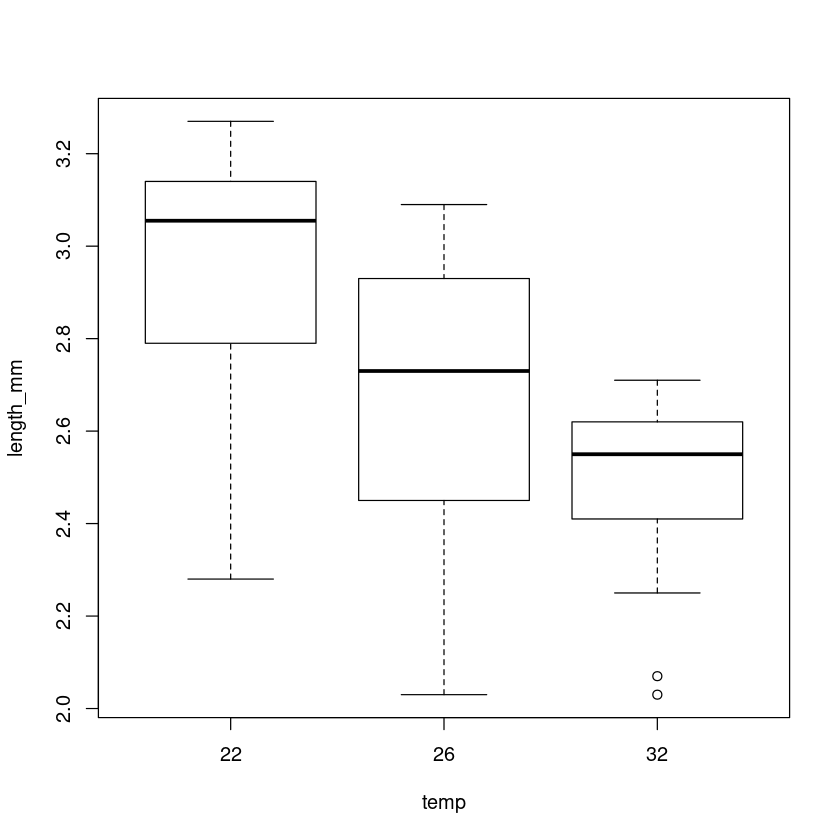

In [9]:
plot(length_mm ~ temp, mozwing)

Looking at the plots, it is clear that there is more spread in the data above the median than below. Create a new variable `logwinglength` in the `mozwing` data frame containing logged millimeter values.

$\star$ Now create a boxplot of log wing length values within temperatures:

In [10]:
mozwing$loglength <- log(mozwing$length_mm)

### Differences in means with barplots

Box and whisker plots show the median and spread in the data very clearly, but we want to test whether the means are different. This is $t$ test territory — how different are the means given the standard error — so it is common to use barplots and standard error bars to show these differences.

We're going to use some R code to construct a barplot by hand. We need to calculate the means and standard errors within temperature groups, but before we can do that, we need a new functions to calculate the standard error of a mean:

In [11]:
seMean <- function(x){ # get standard error of the mean from a set of values (x)
    x <- na.omit(x) # get rid of missing values

    se <- sqrt(var(x)/length(x)) # calculate the standard error

    return(se)  # tell the function to return the standard error
}

Now we can use the function `tapply`: it splits a variable up into groups from a factor and calculates statistics on each group using a function.

In [13]:
lengthMeans <- tapply(mozwing$loglength, mozwing$temp, FUN = mean, na.rm = TRUE)

print(lengthMeans)

       22        26        32 
1.0737861 0.9824950 0.9131609 


And similarly, let's calculate the standard error of the mean using the function we made:   

In [14]:
lengthSE <- tapply(mozwing$loglength, mozwing$temp, FUN = seMean)

print(lengthSE)

        22         26         32 
0.01330309 0.01431165 0.01230405 


Now we have to put these values together on the plot:

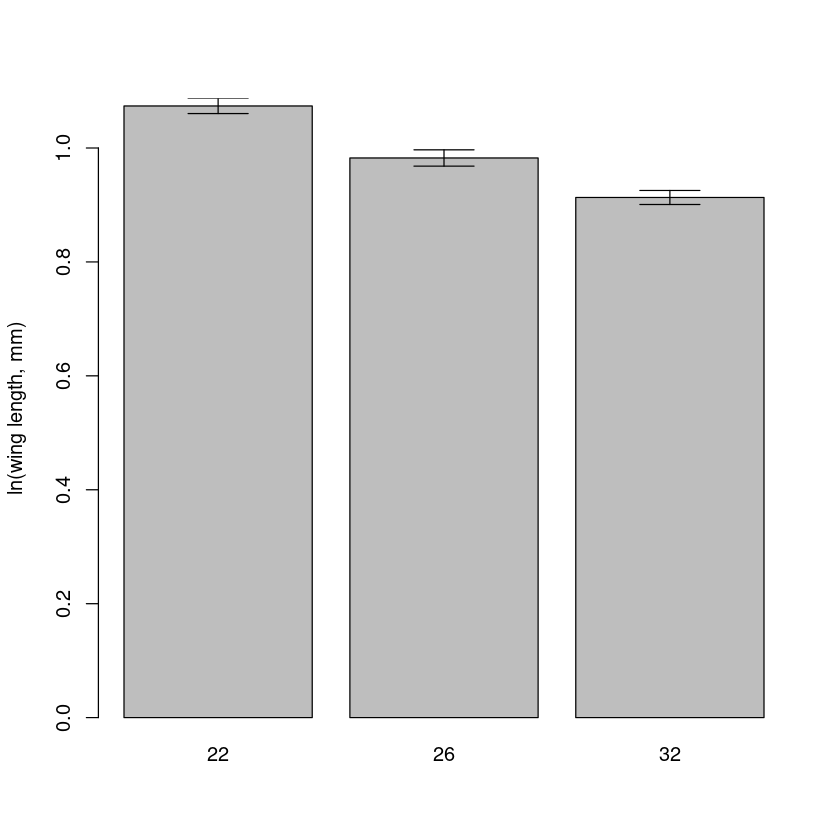

In [15]:
# get the upper and lower limits of the error bars
upperSE <- lengthMeans + lengthSE
lowerSE <- lengthMeans - lengthSE

# get a barplot
# - this function can report where the middle of the bars are on the x-axis
# - set the y axis limits to contain the error bars

barMids <- barplot(lengthMeans, ylim=c(0, max(upperSE)), ylab = 'ln(wing length, mm)')

# Now use the function to add error bars
# - draws arrows between the points (x0,y0) and (x1,y1)
# - arrow heads at each end (code=3) and at 90 degree angles

arrows(barMids, upperSE, barMids, lowerSE, ang=90, code=3)


Now we need to draw all these pieces together into a script and get used to using them.

$\star$ Add all the lines of code from this section into your script. Run it and check you get the graph above.

$\star$ Use the second two chunks as a model to plot a similar graph for food level 

---

In [16]:
seMeanfood <- function(x){ # get standard error of the mean from a set of values (x)
         x <- na.omit(x) # get rid of missing values
        
         se <- sqrt(var(x)/length(x)) # calculate the standard error
        
        return(se)  # tell the function to return the standard error
}

In [17]:
lengthMeansfood <- tapply(mozwing$loglength, mozwing$food_level, FUN = mean, na.rm = TRUE)

print(lengthMeansfood)

      0.1         1 
0.9111556 1.0670992 


In [18]:
lengthSEfood <- tapply(mozwing$loglength, mozwing$food_level, FUN = seMeanfood)

print(lengthSEfood)

        0.1           1 
0.011887620 0.008825873 


Lets get the upper and lower limits of the error bars:

In [19]:
upperSEfood <- lengthMeansfood + lengthSEfood
lowerSEfood <- lengthMeansfood - lengthSEfood

Now we should build a barplot
 - this function can report where the middle of the bars are on the x-axis
 - set the y axis limits to contain the error bars

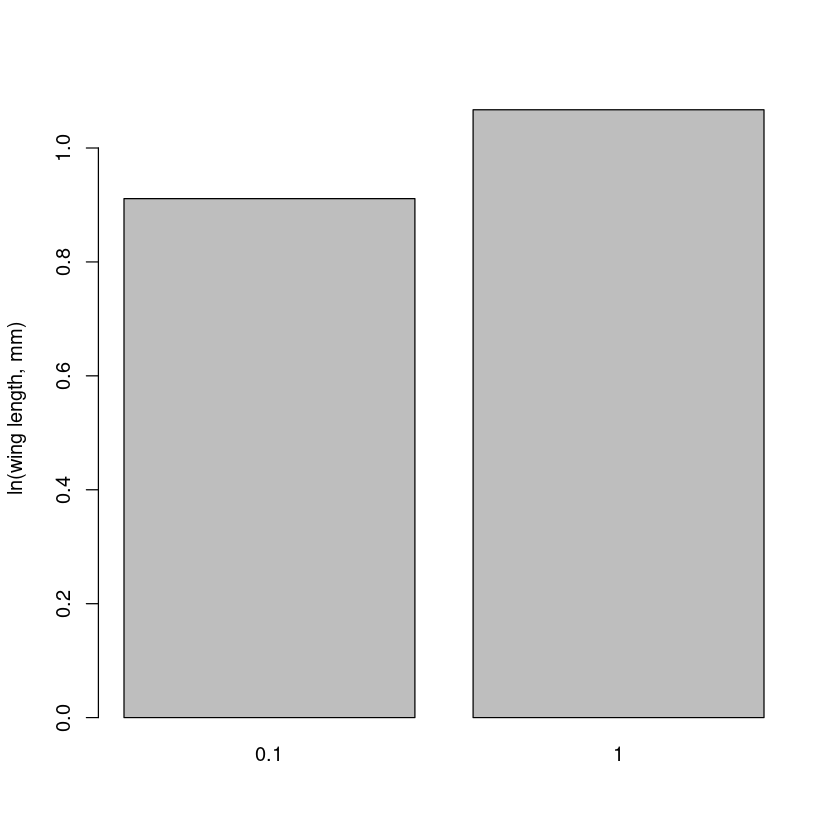

In [20]:
barMidsfood <- barplot(lengthMeansfood, ylim=c(0, max(upperSE)), ylab = 'ln(wing length, mm)')

Now use the function to add error bars
- draws arrows between the points (x0,y0) and (x1,y1)
- arrow heads at each end (code=3) and at 90 degree angles

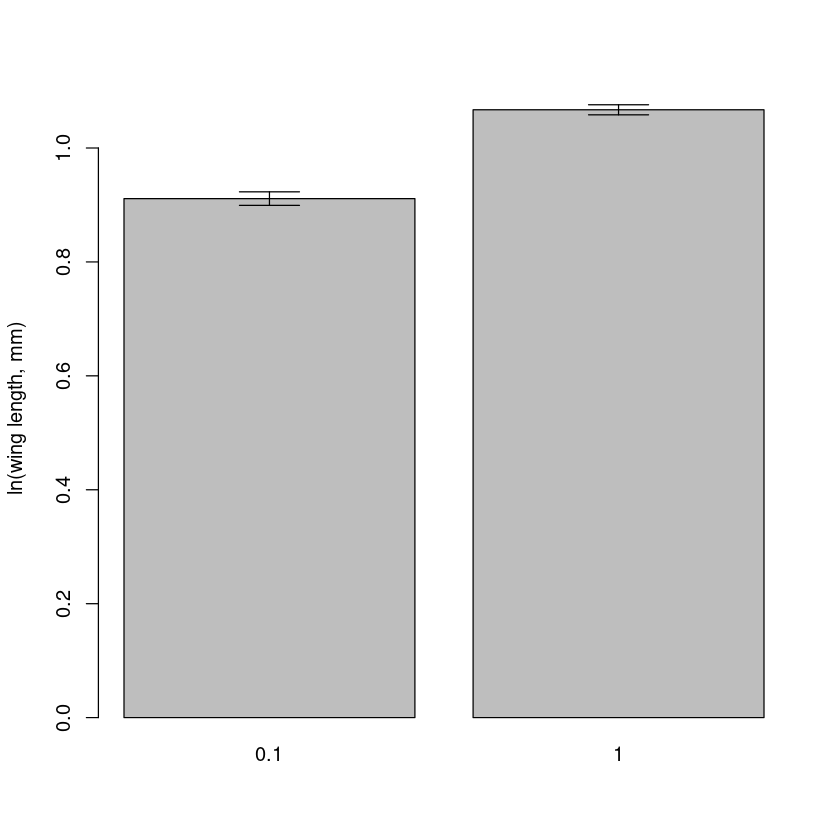

In [23]:
barMidsfood <- barplot(lengthMeansfood, ylim=c(0, max(upperSE)), ylab = 'ln(wing length, mm)')
arrows(barMidsfood, upperSEfood, barMidsfood, lowerSEfood, ang=90, code=3)

### An alternative to barplots

That is a lot of work to go through for a plot. Doing it the hard way uses some useful tricks, but one strength of R is that there is a huge list of add-on packages that you can use to get new functions that other people have written.

We will use the `gplots` package to create plots of group means and confidence intervals. Rather than plotting the means $\pm$ 1 standard error, the option `p=0.95` uses the standard error and the number of data points to get 95% confidence intervals. The default `connect=TRUE` option adds a line connecting the means, which isn't useful here.

$\star$ Replicate the code below into your script and run it to get the plots below.

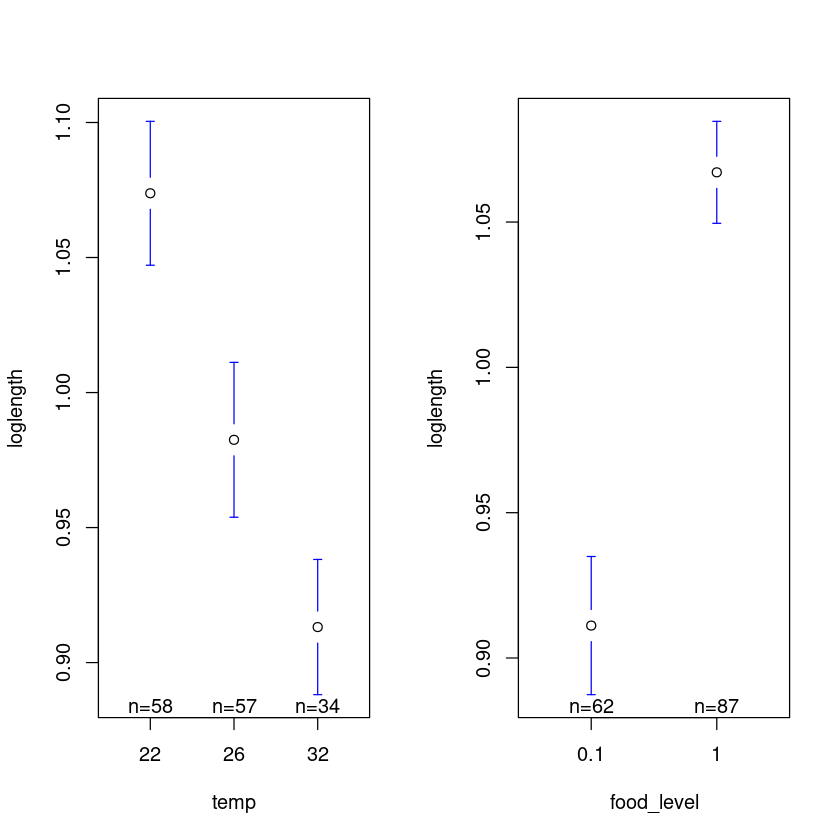

In [24]:
#Load the gplots package
library(gplots)

# Get plots of group means and standard errors
par(mfrow=c(1,2))
plotmeans(loglength ~ temp, data=mozwing, p=0.95, connect=FALSE)
plotmeans(loglength ~ food_level, data=mozwing, p=0.95, connect=FALSE)

## Analysis of variance


Hopefully, those plots should convince you that there are differences in winglength between different temperature and between food levels. We'll now use a linear model to test whether those differences are significant.

$\star$ Using your code from the regression section as a guide, create a linear
model called `lengthLM` which models wing length as a function of temperature.

Use `anova` and `summary` to look at the analysis of variance table and then the coefficients of the model.

The ANOVA table for the model should look like the one below: temperature explains highly significant variation in wing length($F= 30.5, \textrm{df}=2 \textrm{ and } 146, p =8.45e-12$)

In [27]:
lengthLM <- lm(loglength ~ temp, data=mozwing)

In [26]:
anova(lengthLM)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
temp,2,0.5889078,0.294453888,30.51714,8.446441e-12
Residuals,146,1.4087254,0.009648804,NA,NA



*Note the style of reporting the result* - the statistic ($F$), degrees of freedom and $p$ value are all provided in support. 

Pay close attention to the sum of squares column. This model is good, but some will not be. The important ratio is called $r^2$, a measure of explanatory power, and shows that, although a model can be very significant, it might not be very explanatory. We care about explanatory power
or effect size, `*not*` $p$ values.

The coefficients table for the model looks like this:

In [28]:
summary(lengthLM)


Call:
lm(formula = loglength ~ temp, data = mozwing)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.27446 -0.06218  0.02685  0.07266  0.14568 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.07379    0.01290  83.252  < 2e-16 ***
temp26      -0.09129    0.01832  -4.983 1.75e-06 ***
temp32      -0.16063    0.02122  -7.571 3.87e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09823 on 146 degrees of freedom
  (121 observations deleted due to missingness)
Multiple R-squared:  0.2948,	Adjusted R-squared:  0.2851 
F-statistic: 30.52 on 2 and 146 DF,  p-value: 8.446e-12


It shows the following:

* The reference level (or intercept) is for 22c. Their wing length is significantly different from zero - this is not an exciting finding!




In [29]:
TukeyLength <- TukeyHSD(aov(lengthLM))
print(TukeyLength)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = lengthLM)

$temp
             diff        lwr         upr     p adj
26-22 -0.09129112 -0.1346712 -0.04791107 0.0000052
32-22 -0.16062514 -0.2108632 -0.11038706 0.0000000
32-26 -0.06933402 -0.1197347 -0.01893334 0.0039744



The table shows the following:

* The differences between the three possible pairs and then the lower and
upper bounds of the 95% confidence interval for the difference and a $p$
value.

* In each case, we want to know if the difference could be zero: does the
95% confidence interval for each pair include zero.

* For the first two pairs, carnivores versus omnivores and herbivores, the confidence intervals do not include zero, so they are significantly different. For the comparison between herbivores and omnivores, the interval does include zero (difference = 0.039, 95% CI's limits are -0.032 & 0.110), so these groups are not significantly different.

* The $p$ values for the top two pairs are both larger (less significant) than in the summary table. The test has made it harder to find significant results.

You can visualise these confidence intervals by plotting the Tukey test. You have to tweak the graphics parameters to get a clean plot though.

In [30]:
options(repr.plot.res = 100, repr.plot.width = 10, repr.plot.height = 10)

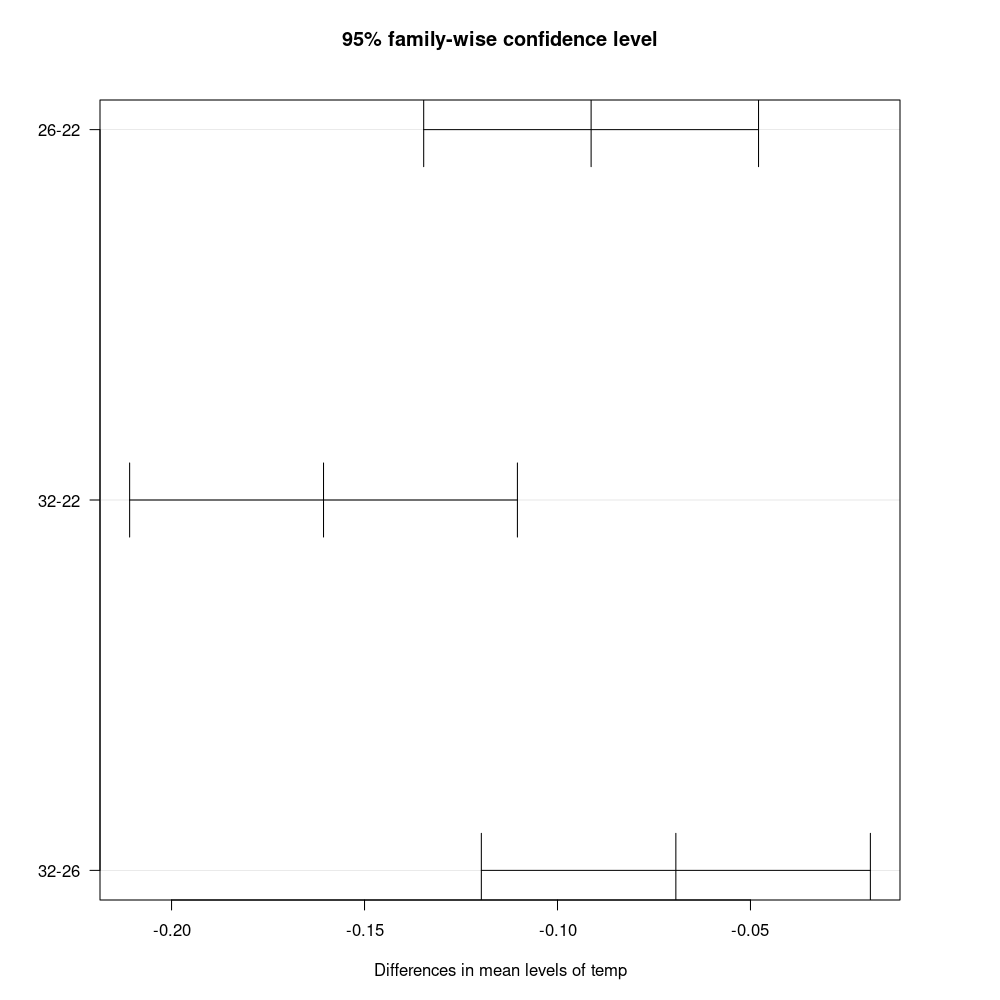

In [31]:
par(mfrow=c(1,1))
par(las=1, mar=c(5,5,5,5))
# las= 1 turns labels horizontal
# mar makes the left margin wider (bottom, left, top, right)
plot(TukeyLength)

$\star$ Include the Tukey test in your script for both the temperature and food models.

### Are the factors independent?

We've looked at two models, using trophic level and ground dwelling. It is worth asking whether these are independent factors. What if, for example, our herbivores are all big, ground dwellers? This is important to know because otherwise, a two-way ANOVA would not be appropriate. We will look at interactions later.

OK, so we want to know whether the two factors are independent. This is a job for the $\chi^2$ test!

## The Chi-square test and count data

The Chi-square test, also known as $\chi^{2}$ test or chi-square test, is designed for scenarios where you want to statistically test how likely it is that an observed distribution of values is due to chance. It is also called a "goodness of fit" statistic, because it measures how well the observed distribution of data fits with the distribution that is expected if the variables of which measurements are made are independent. In our mammals example below, the two variables are trophic level and ground dwelling.

Note that a $\chi^{2}$ test is designed to analyze categorical data. That is the data have been counted (count data) and divided into categories. It is not meant for continuous data (such as body weight, genome size, or height). For example, if you want to test whether
attending class influences how students perform on an exam, using test scores (from 0-100) as data would not be appropriate for a Chi-square test. However, arranging students into the categories "Pass" and "Fail" and counting up how many fall in each categories would be appropriate. Additionally, the data in a Chi-square table (see below) should not be in the form of percentages – only count data are allowed!

### The Chi-square test with the mammals data

We can easily build a table for a Chi-square test on the mammals data as follows:

In [32]:
factorTable <- table(mozwing$temp, mozwing$food_level)
print(factorTable)


    
     0.1  1
  22  45 45
  26  45 45
  32  45 45


Now let's run the test:

In [33]:
chisq.test(factorTable)


	Pearson's Chi-squared test

data:  factorTable
X-squared = 0, df = 2, p-value = 1


The "X-squared" value is the $\chi^{2}$ *test
statistic*, akin to the t-value of the t-test or W value in the
Wilcox test.

The $\chi^{2}$ statistic is calculated as the sum of the quantity

$$\frac{(\mathrm{Observed} - \mathrm{Expected})^2}{\mathrm{Expected}}$$

across all the cells/categories in the table (so the sum would be over 6 categories in our current mammals example).

"Observed" is the observed proportion of data that fall in a certain category. For example, there are 26 species observed in the `Carnivore`, `No` category, and 22 in the `Carnivore`, `Yes` category.

"Expected" is what count would be expected if the values in each category were truly independent. Each cell has its own expected value, which is simply calculated as the count one would expect in each category if the value were generated in proportion to the total number seen in that category. So in our example, the expected value for the `Carnivore`, `No` category would be 

$26+22 \mathrm{~(Total~number~of~carnivore~species)} \times \frac{26+45+64 \mathrm{~(Total~number~in~the~"No"~category)}}{26+22+45+62+64+40 \mathrm{~(Total~number~of~species)}} = 48 \times \frac{135}{259} = 25.02$

The sum of all six (one for each cell in the table above) such calculations would be the $\chi^{2}$ value that R gave you through the `chisq.test()` above — try it!

Now back to the R output from the `chisq.test()` above. Why df = 2? This is calculated as $DF = (r - 1) * (c - 1)$ where $r$ and $c$ are the number of rows and columns in the $\chi^{2}$ table, respectively. The same principle you learned before applies here; you lose one degree of freedom for each new level of information you need to estimate: there is uncertainity about the information (number of categories) in both rows and columns, so you need to lose one degree of freedom for each.

Finally, note that the p-value is significant — we can conclude that the
factors aren't independent. From the table, carnivores can be either
ground dwelling or not, but herbivores tend to be ground dwelling and
omnivores tend not to be. Ah well... it's OK. We will look at a better
way to analyze these data using "interactions" later in multipl explanatory variables.

$\star$ Include and run the $\chi^2$ test in your script.

## Saving data

The last thing to do is to save a copy of the mammal data, including our
new column of log data, for use in later sections.

$\star$ Use this code in your script to create the saved data in your `Data` directory :

In [34]:
save(mozwing, file='mozwing.Rdata')

---
<a id="fn1"></a>
[1]: 

<a id="fn2"></a>
[2]: That is, it is 1 minus the ratio of the square of the standard error of the estimate to the sample variance of the response

<a id="fn3"></a>
[3]: i.e., Standard error of the estimate won't decrease

# Linear Models: Multiple explanatory variables

## Introduction

In this section we will explore fitting a linear model to data when you have multiple explanatory (predictor) variables. 

The aims of this section are[$^{[1]}$](#fn1):

* Learning to build and fit a linear model that includes several explanatory variables

* Learning to interpret the summary tables and diagnostics after fitting a linear model with multiple explanatory variables

## An example

We will now look at a single model that includes both explanatory variables.

The first thing to do is look at the data again. 

### Exploring the data

$\star$ Create a new blank script called `MulExpl.R` in your `Code` directory and add some introductory comments.

This data is from an online database of genome sizes and a [published database of mammalian life history](http://www.genomesize.com/). 

Trait data for these species are taken from: [ Jones, K. E. *et al.* (2009) PanTHERIA: a species-level database of life history, ecology, and geography of extant and recently extinct mammals. Ecology 90, 2648–2648](http://esapubs.org/archive/ecol/e090/184/metadata.htm).

$\star$ Download the file `MammalData.csv` and save to your `Data` directory.

In [3]:
mammals <- read.csv('../data/mammals.csv')

Look back at the end of the previous section to see how you saved the RData file. If `mammals.Rdata` is missing, just import the data again using `read.csv` and add the `log C Value` column to the imported data frame again (go back to the ANOVA section and have a look if you have forgotten how).

Use `ls()`, and then `str` to check that the data has loaded correctly:

In [4]:
str(mammals)

'data.frame':	379 obs. of  10 variables:
 $ Binomial       : Factor w/ 379 levels "Acinonyx jubatus",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ meanCvalue     : num  2.56 2.64 3.75 3.7 3.98 4.69 2.15 2.43 2.73 2.92 ...
 $ Order          : Factor w/ 21 levels "Artiodactyla",..: 2 17 17 17 1 1 4 17 17 17 ...
 $ AdultBodyMass_g: num  50500 41.2 130 96.5 94700 52300 15 25.3 50.5 33 ...
 $ DietBreadth    : int  1 NA 2 NA 5 2 NA 4 NA NA ...
 $ HabitatBreadth : int  1 NA 2 2 1 1 1 2 NA 1 ...
 $ LitterSize     : num  2.99 2.43 3.07 NA 1 1 0.99 4.59 3.9 3.77 ...
 $ GroundDwelling : Factor w/ 2 levels "No","Yes": 2 NA 2 2 2 2 1 2 NA 2 ...
 $ TrophicLevel   : Factor w/ 3 levels "Carnivore","Herbivore",..: 1 NA 2 NA 2 2 NA 3 NA NA ...
 $ logCvalue      : num  0.94 0.971 1.322 1.308 1.381 ...


In the regression section, we asked if carnivores or herbivores had larger genomes. Now we want to ask questions like: do ground-dwelling carnivores have larger genomes than arboreal or flying omnivores? We need to look at plots within groups.

Before we do that, there is a lot of missing data in the data frame and we should make sure that we are using the same data for our plots and models. We will subset the data down to the complete data for the three variables:

In [5]:
mammals <- subset(mammals, select = c(GroundDwelling, TrophicLevel, 
logCvalue))
mammals <- na.omit(mammals)
str(mammals)

'data.frame':	259 obs. of  3 variables:
 $ GroundDwelling: Factor w/ 2 levels "No","Yes": 2 2 2 2 2 1 2 1 1 1 ...
 $ TrophicLevel  : Factor w/ 3 levels "Carnivore","Herbivore",..: 1 2 2 2 3 3 3 2 2 3 ...
 $ logCvalue     : num  0.94 1.322 1.381 1.545 0.888 ...
 - attr(*, "na.action")= 'omit' Named int [1:120] 2 4 7 9 10 11 14 15 20 21 ...
  ..- attr(*, "names")= chr [1:120] "2" "4" "7" "9" ...


### Boxplots within groups

In the regression section, we used the `subset` option to fit a model just to dragonflies. You can use `subset` with plots too.

$\star$ Add `par(mfrow=c(1,2))` to your script to split the graphics into two panels.

$\star$ Copy over and modify the code from the ANOVA section to create a boxplot of genome size by trophic level into your script.

$\star$ Now further modify the code to generate the plots shown in the figure below (you will have to `subset` your data for this, and also use the subset option of the `plot` command).

---

<img src="./graphics/boxplots.svg" width="600px">
<small><br> <center> Boxplots of log c value by trophic level, sub-divided by habitat preference.
</center> </small>

---

```{tip}
You can use the `plot` function's option `main = ` to add titles to a plot.
```

### `lattice` again

Recall that the `lattice` package provides some very neat extra ways to plot data in groups. They look pretty but the downside is that they don't use the same graphics system — all those `par` commands are useless for these graphs. The defaults look good though!

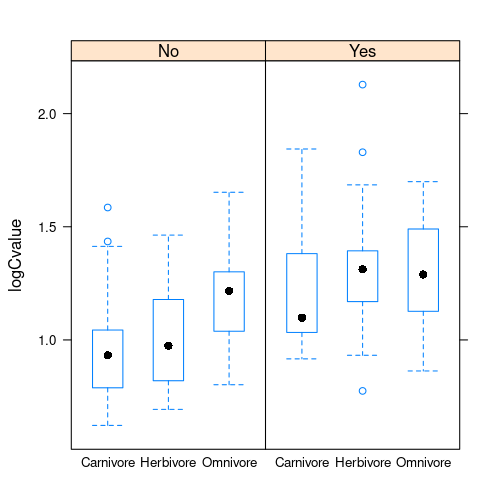

In [6]:
library(lattice)
bwplot(logCvalue ~ TrophicLevel | GroundDwelling, data= mammals)

The code `logCvalue ~ TrophicLevel | GroundDwelling` means plot the relationship between genome size and trophic level, but group within levels of ground dwelling. We are using the function `bwplot`, which is provided by `lattice` to create box and whisker plots.

$\star$ Create the lattice plots above from within your script.

Rearrange this code to have three plots, showing the box and whisker plots for `GroundDwelling`, grouped within the levels of `TrophicLevel`.

Try reshaping the R plot window and running the command again. Lattice tries to make good use of the available space when creating lattice plots.

### Barplots again

We're going to make the barplot code from the regression section even more complicated! This time we want to know the mean log genome size within combinations of `TrophicLevel` and `GroundDwelling`. We can still use `tapply`, providing more than one grouping factor. We create a set of grouping factors like this:

In [7]:
groups <- list(mammals$GroundDwelling, mammals$TrophicLevel)
groupMeans <- tapply(mammals$logCvalue, groups, FUN = mean)
print(groupMeans)

    Carnivore Herbivore Omnivore
No  0.9589465  1.012459 1.191760
Yes 1.2138170  1.297662 1.299017


$\star$ Copy this code into your script and run it.

Use this code and the script from the ANOVA section to get the set of
standard errors for the groups `groupSE`:

In [8]:
seMean <- function(x){
	# get rid of missing values
	x <- na.omit(x)
	# calculate the standard error
	se <- sqrt(var(x)/length(x))
	# tell the function to report the standard error
	return(se)
}

In [9]:
groups <- list(mammals$GroundDwelling, mammals$TrophicLevel)

groupMeans <- tapply(mammals$logCvalue, groups, FUN=mean)
print(groupMeans)

    Carnivore Herbivore Omnivore
No  0.9589465  1.012459 1.191760
Yes 1.2138170  1.297662 1.299017


In [10]:
groupSE <- tapply(mammals$logCvalue, groups, FUN=seMean)
print(groupSE)

     Carnivore  Herbivore   Omnivore
No  0.04842209 0.03418613 0.02410400
Yes 0.05975510 0.02787009 0.03586826


Now we can use `barplot`. The default option for a barplot of
a table is to create a stacked barplot, which is not what we want. The
option `beside=TRUE` makes the bars for each column appear
side by side.

Once again, we save the midpoints of the bars to add the
error bars. The other options in the code below change the colours of
the bars and the length of error bar caps.

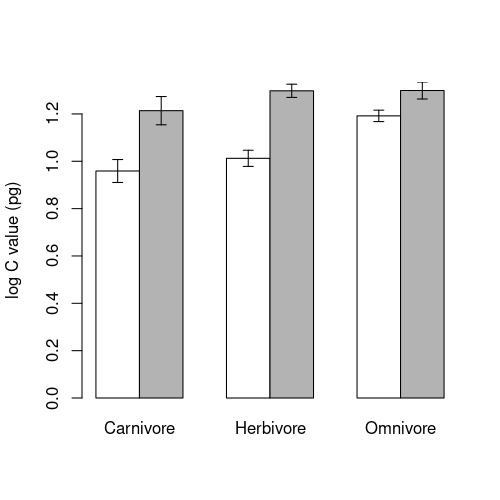

In [11]:
# get upper and lower standard error height
upperSE <- groupMeans + groupSE
lowerSE <- groupMeans - groupSE
# create barplot
barMids <- barplot(groupMeans, ylim=c(0, max(upperSE)), beside=TRUE, ylab= ' log C value (pg) ' , col=c( ' white ' , ' grey70 '))
arrows(barMids, upperSE, barMids, lowerSE, ang=90, code=3, len=0.05)

$\star$ Generate the barplot above and then edit your script to change the colours and error bar lengths to your taste.

### Plotting means and confidence intervals

We'll use the `plotmeans` function again as an exercise to change graph settings and to prepare figures for reports and write ups. This is the figure you should be able to reproduce the figure below.

---

<img src="./graphics/plotmeans.svg" width="600px">

<small> <center> Means and 95% confidence intervals for log genome size (picograms) in mammals for different trophic levels for a) ground dwelling species and b) other species. </center> </small>

---

$\star$ Use `plotmeans` from the ANOVA section and the `subset` option to generate the two plots below. You will need to
set the `ylim` option for the two plots to make them use the same $y$ axis.

$\star$ Use `text` to add labels — the command `par('usr')` will show you the limits of the plot ($x_{min}, x_{max}, y_{min}, y_{max}$) and help pick a location for the labels.

$\star$ Change the `par` settings in your code and redraw the plots to try and make better use of the space. In the example below, the box shows the edges of the R graphics window.

Note the following about the the figure above (generated using plotmeans)): 

* **White space**: The default options in R use wide margins and spaced out axes and take up a lot of space that could be used for plotting data. You've already seen the `par` function and the options `mfrow` for multiple plots and `mar` to adjust margin size. The option `mgp` adjusts the placement of the axis label, tick labels and tick locations. See `?par` for help on the these options.

* **Main titles**: Adding large titles to graphs is also a bad idea — it uses lots of space to explain something that should be in the figure legend. With multiple plots in a figure, you have to label graphs so that the figure legend can refer to them. You can add labels using `text(x,y,'label')`.

* **Figure legends**: A figure caption and legend should give a clear stand-alone description of the whole figure.

* **Referring to figures**: You *must* link from your text to your figures — a reader has to know which figures refer to which results. So: "There are clear differences in mean genome size between species at different trophic levels and between ground dwelling and other species, Figure xx".


## Fitting the linear model

All those exploratory visualizations suggest:

* Carnivores have smaller genome size; omnivores have larger genome size.

* Herbivores are somewhere in between, but not consistently.

* All ground dwelling mammals typically have larger genome sizes.

We suspected these things from the ANOVA section analyses, but now we can see that they might have separate effects. We'll fit a linear model to explore this and add the two explanatory variables together.

$\star$ This is an important section — read it through carefully and ask questions if you are unsure. Copy the code into your script and add comments. *Do not just jump to the next action item*!

$\star$ First, fit the model:

In [12]:
model <- lm(logCvalue ~ TrophicLevel + GroundDwelling, data = mammals)    

We're going to do things right this time and check the model diagnostics
before we rush into interpretation.

In [22]:
library(repr) ; options(repr.plot.res = 100, repr.plot.width = 7, repr.plot.height = 8) # Change plot size

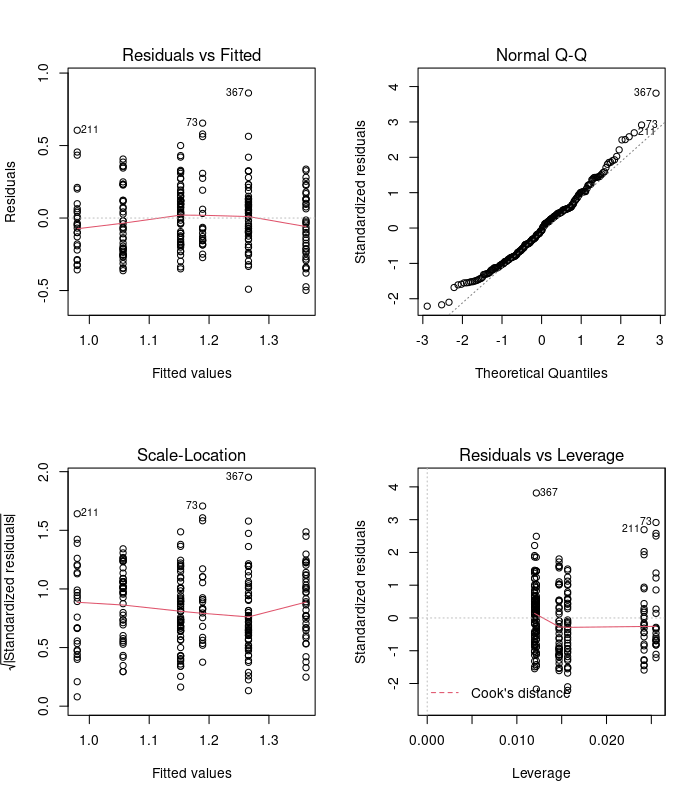

In [23]:
par(mfrow=c(2,2))
plot(model)

In [24]:
library(repr) ; options(repr.plot.res = 100, repr.plot.width = 6, repr.plot.height = 6) # Change plot size

Examine these diagnostic plots. There are six predicted values now - three trophic levels for each of the two levels of ground dwelling. Those plots look ok so now we can look at the analysis of variance table:

In [14]:
anova(model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
TrophicLevel,2,0.8141063,0.40705316,7.859815,4.870855e-04
GroundDwelling,1,2.7469218,2.74692183,53.040485,4.062981e-12
Residuals,255,13.2062341,0.05178915,NA,NA


*Ignore the $p$ values*! Yes, they're highly significant but we want to understand the model, not rubber stamp it with 'significant'.

The sums of squares for the variables are both small compared to the residual sums of squares — there is lots of unexplained variation. We can calculate the $r^2$ as explained sums of squares over total sums of squares:

$$\frac{0.81 + 2.75}{0.81 + 2.75 + 13.21} = \frac{3.56}{16.77} = 0.212$$

Trophic level explain much less variation than ground dwelling — this makes intuitive sense from the plots since there are big differences between in the figure we generated above (using plotmeans) (a vs b), but small differences within.

We could also calculate a significance for the whole model by merging the terms. The total explained sums of squares of $0.81 + 2.75  = 3.56$ uses $2+1 =3$ degrees of freedom, so the mean sums of squares for all the terms together is $3.56/3=1.187$. Dividing this by the residual mean square of 0.052 gives an F of $1.187 / 0.052 = 22.83$.

Now we can look at the summary table to see the coefficients:

In [15]:
summary(model) 


Call:
lm(formula = logCvalue ~ TrophicLevel + GroundDwelling, data = mammals)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.49902 -0.17844 -0.01462  0.12496  0.86242 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            0.97976    0.03539  27.682  < 2e-16 ***
TrophicLevelHerbivore  0.07659    0.03969   1.930   0.0547 .  
TrophicLevelOmnivore   0.17269    0.03977   4.343 2.03e-05 ***
GroundDwellingYes      0.20947    0.02876   7.283 4.06e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2276 on 255 degrees of freedom
Multiple R-squared:  0.2124,	Adjusted R-squared:  0.2031 
F-statistic: 22.92 on 3 and 255 DF,  p-value: 3.602e-13


Starting at the bottom of this output, `summary` has again calculated $r^2$ for us and also an $F$ statistic for the whole model, which matches the calculation above.

The other important bits are the four coefficients. The intercept is now the reference level for two variables: it is the mean for carnivores that are not ground dwelling. We then have differences from this value for being an omnivore or herbivore and for being ground dwelling. There is a big change in genome size associated with ground dwelling and
omnivory and both of these have large effects sizes, each introducing about a 20% difference in genome size from the non-ground dwelling carnivores. In contrast, herbivory makes a small difference — about 8%. 

Because the difference is small and the standard error is large, the $t$ value suggests that this difference might arise just by chance. Put another way, it isn't significant.

The table below shows how these four coefficients combine to give the predicted values for each of the group means.

| |Carnivore|Herbivore|Omnivore|
|:-|:---|:---|:---|
|**Not ground** | *0.98* = 0.98    | *0.98 + 0.08* = 1.06    | *0.98 + 0.17* = 1.15 |
|**Ground**|  *0.98 + 0.21* = 1.19    | *0.98  + 0.08 + 0.21* =1.27   | *0.98 + 0.17 + 0.21* = 1.36|



### Predicted values

Getting the model predictions by hand in this way is tedious and error prone. There is a handy function called `predict` which uses the model directly to calculate values. The default is to give you the prediction for each point in the original data, but you can also ask for specific predictions.

The first thing to do is to set up a small data frame containing the explanatory values we want to use. The variable names and the level name have to match *exactly*, so we'll use the `levels` function to get the names. We want to look at all six combinations, so we'll use the `rep` function to set this up. The `each = 2` option repeats each value twice in succession; the `times = 3` options repeats the whole set of values three times.

Let's do it:

In [16]:
# data frame of combinations of variables
gd <- rep(levels(mammals$GroundDwelling), times = 3)
print(gd)

[1] "No"  "Yes" "No"  "Yes" "No"  "Yes"


In [17]:
tl <- rep(levels(mammals$TrophicLevel), each = 2)
print(tl)

[1] "Carnivore" "Carnivore" "Herbivore" "Herbivore" "Omnivore"  "Omnivore" 


In [18]:
predVals <- data.frame(GroundDwelling = gd, TrophicLevel = tl)

Now we have the data frame of values we want, we can use `predict`. Just as when we created log values, we can save the output back into a new column in the data frame:

In [19]:
predVals$predict <- predict(model, newdata = predVals)
print(predVals)

  GroundDwelling TrophicLevel   predict
1             No    Carnivore 0.9797572
2            Yes    Carnivore 1.1892226
3             No    Herbivore 1.0563447
4            Yes    Herbivore 1.2658102
5             No     Omnivore 1.1524491
6            Yes     Omnivore 1.3619145


Not that these are in the same order as the bars from your barplot. 

$\star$ Make a copy of the barplot and arrows code from above and modify it

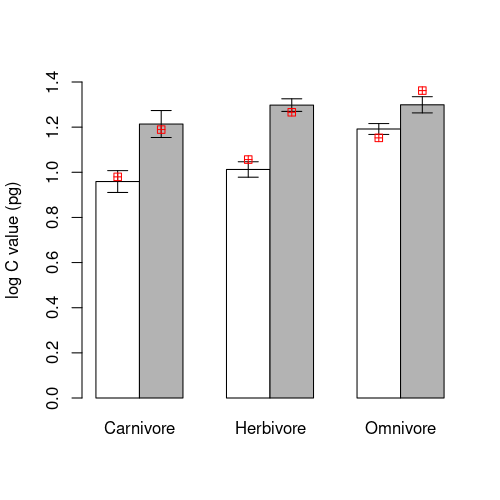

In [20]:
barMids <- barplot(groupMeans, ylim=c(0, 1.4), ylab='log C value (pg)', beside=TRUE, col=c('white', 'grey70'))

arrows(barMids, upperSE, barMids, lowerSE, ang=90, code=3, len=0.1)
points(barMids, predVals$predict, col='red', pch=12)

The red markers do not match to the calculated means. This is because the model only includes a single difference between ground and non-ground species, which has to be the same for each trophic group. That is, there is no interaction between trophic level and ground / non-ground identity of each species in the current model.

$\star$ Add the code for this plot to your script file.

# Linear Models: Multiple variables with interactions

## Introduction 

Here you will build on your skills in fitting linear models with multiple explanatory variables to data. You will learn about another commonly used Linear Model fitting technique: ANCOVA.

We will build two models in this section:

* **Model 1**: Is mammalian genome size predicted by interactions between trophic level and whether species are ground dwelling?

* **ANCOVA**: Is body size in Odonata predicted by interactions between genome size and taxonomic suborder?

So far, we have only looked at the independent effects of variables. For example, in the trophic level and ground dwelling model from the first multiple explanatory variables section, we only looked for specific differences for being a omnivore *or* being ground dwelling, not for being
specifically a *ground dwelling omnivore*. These independent effects of a variable are known as *main effects* and the effects of combinations of variables acting together are known as *interactions* — they describe how the variables *interact*.

### Section aims

The aims of this section are[$^{[1]}$](#fn1):

* Creating more complex Linear Models with multiple explanatory variables

* Including the effects of interactions between multiple variables in a linear model

* Plotting predictions from more complex (multiple explanatory variables) linear models


### Formulae with interactions in R

We've already seen a number of different model formulae in R. They all use this syntax:

`response variable ~ explanatory variable(s)`

But we are now going to see two extra pieces of syntax:

* `y ~ a + b + a:b`: The `a:b` means the interaction between `a` and `b` — do combinations of these variables lead to different outcomes?

* `y ~ a * b`:  This a shorthand for the model above. The means fit `a` and `b` as main effects and their interaction `a:b`. 

## Model 1: Mammalian genome size

$\star$ Make sure you have changed the working directory to `Code` in your stats coursework directory.

$\star$ Create a new blank script called 'Interactions.R' and add some introductory comments.

$\star$ Load the data:

In [11]:
load('../data/mammals.Rdata')

If `mammals.Rdata` is missing, just import the data again using `read.csv`. You will then have to add the log C Value column to the imported data frame again.

Let's refit the model from the earlier multiple explanatory variable section, but including the interaction between trophic level and ground dwelling. We'll immediately check the model is appropriate:

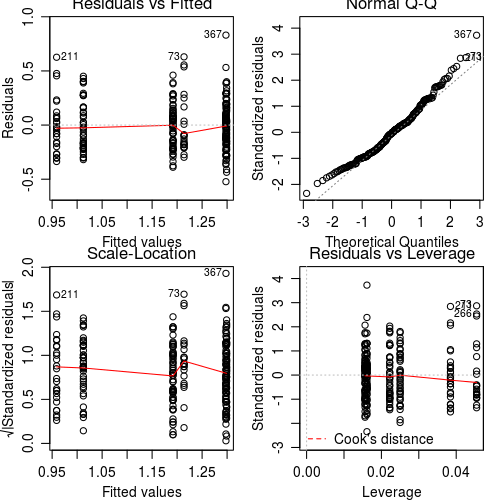

In [12]:
model <- lm(logCvalue ~ TrophicLevel * GroundDwelling, data= mammals)
par(mfrow=c(2,2), mar=c(3,3,1,1), mgp=c(2, 0.8,0))
plot(model)   

Now, examine the `anova` and `summary` outputs for the model:

In [13]:
anova(model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
TrophicLevel,2,0.8141063,0.40705316,8.061439,4.036387e-04
GroundDwelling,1,2.7469218,2.74692183,54.401106,2.335706e-12
TrophicLevel:GroundDwelling,2,0.4312875,0.21564376,4.270693,1.499280e-02
Residuals,253,12.7749466,0.05049386,NA,NA


Compared to the model from the first multiple explanatory variables section, there is an extra line at the bottom. The top two are the same and show that trophic level and ground dwelling both have independent main effects. The extra line
shows that there is also an interaction between the two. It doesn't explain a huge amount of variation, about half as much as trophic level, but it is significant.

Again, we can calculate the $r^2$ for the model: 

$\frac{0.81 + 2.75 + 0.43}{0.81+2.75+0.43+12.77} = 0.238$ 

The model from the first multiple explanatory variables section without the interaction had an $r^2 = 0.212$ — our new
model explains 2.6% more of the variation in the data.

The summary table is as follows:

In [14]:
summary(model)


Call:
lm(formula = logCvalue ~ TrophicLevel * GroundDwelling, data = mammals)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.52294 -0.17069 -0.01003  0.11920  0.83057 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                              0.95895    0.04407  21.760  < 2e-16
TrophicLevelHerbivore                    0.05351    0.05535   0.967 0.334605
TrophicLevelOmnivore                     0.23281    0.05226   4.455 1.26e-05
GroundDwellingYes                        0.25487    0.06509   3.915 0.000116
TrophicLevelHerbivore:GroundDwellingYes  0.03033    0.07857   0.386 0.699791
TrophicLevelOmnivore:GroundDwellingYes  -0.14761    0.07930  -1.861 0.063839
                                           
(Intercept)                             ***
TrophicLevelHerbivore                      
TrophicLevelOmnivore                    ***
GroundDwellingYes                       ***
TrophicLevelHerbivore:GroundDwellingYes    

The lines in this output are:

1. The reference level (intercept) for non ground dwelling carnivores. (The reference level is decided just by the alphabetic order of the levels)
2. Two differences for being in different trophic levels.
3. One difference for being ground dwelling
4. Two new differences that give specific differences for ground dwelling herbivores and omnivores.

The first four lines, as in the model from the ANOVA section, which would allow us to find the predicted values for each group *if the size of the differences did not vary between levels because of the interactions*. That is, this part of the model only includes a single difference ground and non-ground species, which has to be the same for each trophic group because it ignores interactions between trophic level and ground / non-ground identity of each species. The last two lines then give the estimated coefficients associated with the interaction terms, and allow cause the size of differences to vary
between levels because of the further effects of interactions.

The table below show how these combine to give the predictions for each group combination, with those two new lines show in red:

| |**Not ground** |  **Ground** |
|:- |:- |:-|
|**Carnivore** | 0.96 = 0.96 |  0.96 + 0.25 = 1.21 |
|**Herbivore** | 0.96 + 0.05 = 1.01 | 0.96 + 0.05 + 0.25<span style="color:red"> + 0.03</span> = 1.29|
|**Omnivore** | 0.96 + 0.23 = 1.19 | 0.96 + 0.23 + 0.25<span style="color:red"> - 0.15</span> = 1.29|

So why are there two new coefficients? For interactions between two factors, there are always $(n-1)\times(m-1)$ new coefficients, where $n$ and $m$ are the number of levels in the two factors (Ground dwelling or not: 2 levels and trophic level: 3 levels, in our current example). So in this model, $(3-1) \times (2-1) =2$. It might be easier to understand why graphically: 

![image](./graphics/interactionsdiag.png)

The prediction for the white boxes above can be found by adding the main effects together but for the grey boxes, we need to find specific differences. So there are $(n-1)\times(m-1)$ interaction coefficients (count the number of grey boxes) to add.

If we put this together, what is the model telling us?

* Herbivores have the same genome sizes as carnivores, but omnivores have larger genomes.

* Ground dwelling mammals have larger genomes.

These two findings suggest that ground dwelling omnivores should have extra big genomes. However, the interaction shows they are smaller than expected and are, in fact, similar to ground dwelling herbivores.

Note that although the interaction term in the `anova` output is significant, neither of the two coefficients in the `summary` has a $p<0.05$. There are two weak differences (one
very weak, one nearly significant) that together explain significant
variance in the data.

$\star$ Copy the code above into your script and run the model.

Make sure you understand the output!

Just to make sure the sums above are correct, we'll use the same code as
in earlier multiple explanatory variables section to get R to calculate predictions for us, similar to the way we did before:

In [15]:
# a data frame of combinations of variables
gd <- rep(levels(mammals$GroundDwelling), times = 3)
print(gd)

[1] "No"  "Yes" "No"  "Yes" "No"  "Yes"


In [16]:
tl <- rep(levels(mammals$TrophicLevel), each = 2)
print(tl)

[1] "Carnivore" "Carnivore" "Herbivore" "Herbivore" "Omnivore"  "Omnivore" 


Again, remember that the `each = 2` option repeats each value twice in succession; the `times = 3` options repeats the whole set of values (the whole vector) three times.

In [17]:
# New data frame
predVals <- data.frame(GroundDwelling = gd, TrophicLevel = tl)

# predict using the new data frame
predVals$predict <- predict(model, newdata = predVals)
print(predVals)

  GroundDwelling TrophicLevel   predict
1             No    Carnivore 0.9589465
2            Yes    Carnivore 1.2138170
3             No    Herbivore 1.0124594
4            Yes    Herbivore 1.2976624
5             No     Omnivore 1.1917603
6            Yes     Omnivore 1.2990165


$\star$ Include and run the code for gererating these predictions in your script.

If we plot these data points onto the barplot from the first multiple explanatory variables section, they now lie exactly on the mean values, because we've allowed for interactions. The triangle on this plot shows the predictions for ground dwelling omnivores from the main effects ($0.96 + 0.23  + 0.25 = 1.44$), the interaction of $-0.15$ pushes the prediction back down.

![image](./graphics/predPlot.svg)



## Model 2 (ANCOVA): Body Weight in Odonata

We'll go all the way back to the regression analyses from the Regression section. Remember that we fitted two separate regression lines to the data for damselflies and dragonflies. We'll now use an interaction to fit these in a single model. This kind of linear model — with a mixture of continuous variables and factors — is often called an *analysis of covariance*, or ANCOVA. That is, ANCOVA is a type of linear model that blends ANOVA and regression. ANCOVA evaluates whether population means of a dependent variable are equal across levels of a categorical independent variable, while statistically controlling for the effects of other continuous variables that are not of primary interest, known as covariates.

*Thus, ANCOVA is a linear model with one categorical and one or more continuous predictors*.

We will use the odonates data.

$\star$ First load the data:

In [18]:
odonata <- read.csv('../data/GenomeSize.csv')

$\star$ Now create two new variables in the `odonata` data set called `logGS` and `logBW` containing log genome size and log body weight:

In [19]:
odonata$logGS <- log(odonata$GenomeSize)
odonata$logBW <- log(odonata$BodyWeight)

The models we fitted [before](12-ExpDesign.ipynb) looked like this:

![image](./graphics/dragonData.svg)

We can now fit the model of body weight as a function of both genome size and suborder:

In [20]:
odonModel <- lm(logBW ~ logGS * Suborder, data = odonata)

In [21]:
summary(odonModel)


Call:
lm(formula = logBW ~ logGS * Suborder, data = odonata)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3243 -0.3225  0.0073  0.3962  1.4976 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -2.39947    0.08475 -28.311  < 2e-16 ***
logGS                    1.00522    0.22367   4.494 1.99e-05 ***
SuborderZygoptera       -2.24895    0.13540 -16.610  < 2e-16 ***
logGS:SuborderZygoptera -2.14919    0.46186  -4.653 1.07e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6499 on 94 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.7549,	Adjusted R-squared:  0.7471 
F-statistic:  96.5 on 3 and 94 DF,  p-value: < 2.2e-16


Again, we'll look at the <span>anova</span> table first:

In [13]:
anova(odonModel)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
logGS,1,1.144458,1.1444583,2.710007,1.030601e-01
Suborder,1,111.967748,111.9677481,265.132794,4.154783e-29
logGS:Suborder,1,9.144522,9.1445216,21.653669,1.068365e-05
Residuals,94,39.696969,0.4223082,NA,NA


Interpreting this:

* There is no significant main effect of log genome size. The *main* effect is the important thing here — genome size is hugely important but does very different things for the two different suborders. If we ignored `Suborder`, there isn't an overall relationship: the average of those two lines is pretty much flat.

* There is a very strong main effect of Suborder: the mean body weight in the two groups are very different.

* There is a strong interaction between suborder and genome size. This is an interaction between a factor and a continuous variable and shows that the *slopes* are different for the different factor levels.

Now for the summary table:

In [14]:
summary(odonModel)


Call:
lm(formula = logBW ~ logGS * Suborder, data = odonata)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3243 -0.3225  0.0073  0.3962  1.4976 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -2.39947    0.08475 -28.311  < 2e-16 ***
logGS                    1.00522    0.22367   4.494 1.99e-05 ***
SuborderZygoptera       -2.24895    0.13540 -16.610  < 2e-16 ***
logGS:SuborderZygoptera -2.14919    0.46186  -4.653 1.07e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6499 on 94 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.7549,	Adjusted R-squared:  0.7471 
F-statistic:  96.5 on 3 and 94 DF,  p-value: < 2.2e-16


* The first thing to note is that the $r^2$ value is really high. The model explains three quarters (0.752) of the variation in the data.

* Next, there are four coefficients:

    * The intercept is for the first level of `Suborder`, which is Anisoptera (dragonflies).
    * The next line, for `log genome size`, is the slope for Anisoptera. 
    * We then have a coefficient for the second level of `Suborder`, which is Zygoptera (damselflies). As with the first model, this difference in factor levels is a difference in mean values and shows the difference in the intercept for Zygoptera.
    * The last line is the interaction between `Suborder` and `logGS`. This shows how the slope for Zygoptera differs from the slope for Anisoptera.

How do these hang together to give the two lines shown in the model? We can calculate these by hand: 

\begin{align*}
 \textrm{Body Weight} &= -2.40 + 1.01 \times \textrm{logGS} & \textrm{[Anisoptera]}\\
 \textrm{Body Weight} &= (-2.40 -2.25) + (1.01 - 2.15) \times \textrm{logGS} & \textrm{[Zygoptera]}\\
        &= -4.65 - 1.14 \times \textrm{logGS}
\end{align*}

$\star$ Add the above code into your script and check that you understand the outputs.

We'll use the `predict` function again to get the predicted values from the model and add lines to the plot above.

First, we'll create a set of numbers spanning the range of genome size:

In [15]:
#get the range of the data:
rng <- range(odonata$logGS)
#get a sequence from the min to the max with 100 equally spaced values:
LogGSForFitting <- seq(rng[1], rng[2], length = 100)

Have a look at these numbers:

In [16]:
print(LogGSForFitting)

  [1] -0.891598119 -0.873918728 -0.856239337 -0.838559945 -0.820880554
  [6] -0.803201163 -0.785521772 -0.767842380 -0.750162989 -0.732483598
 [11] -0.714804206 -0.697124815 -0.679445424 -0.661766032 -0.644086641
 [16] -0.626407250 -0.608727859 -0.591048467 -0.573369076 -0.555689685
 [21] -0.538010293 -0.520330902 -0.502651511 -0.484972119 -0.467292728
 [26] -0.449613337 -0.431933946 -0.414254554 -0.396575163 -0.378895772
 [31] -0.361216380 -0.343536989 -0.325857598 -0.308178207 -0.290498815
 [36] -0.272819424 -0.255140033 -0.237460641 -0.219781250 -0.202101859
 [41] -0.184422467 -0.166743076 -0.149063685 -0.131384294 -0.113704902
 [46] -0.096025511 -0.078346120 -0.060666728 -0.042987337 -0.025307946
 [51] -0.007628554  0.010050837  0.027730228  0.045409619  0.063089011
 [56]  0.080768402  0.098447793  0.116127185  0.133806576  0.151485967
 [61]  0.169165358  0.186844750  0.204524141  0.222203532  0.239882924
 [66]  0.257562315  0.275241706  0.292921098  0.310600489  0.328279880
 [71] 

We can now use the model to predict the values of body weight at each of those points for each of the two suborders:

In [17]:
#get a data frame of new data for the order
ZygoVals <- data.frame(logGS = LogGSForFitting, Suborder = "Zygoptera")

#get the predictions and standard error
ZygoPred <- predict(odonModel, newdata = ZygoVals, se.fit = TRUE)

#repeat for anisoptera
AnisoVals <- data.frame(logGS = LogGSForFitting, Suborder = "Anisoptera")
AnisoPred <- predict(odonModel, newdata = AnisoVals, se.fit = TRUE)

We've added `se.fit=TRUE` to the function to get the standard error around the regression lines. Both `AnisoPred` and `ZygoPred` contain predicted values (called `fit`) and standard error values (called `se.fit`) for each of the values in our generated values in `LogGSForFitting` for each of the two suborders.

We can add the predictions onto a plot like this:

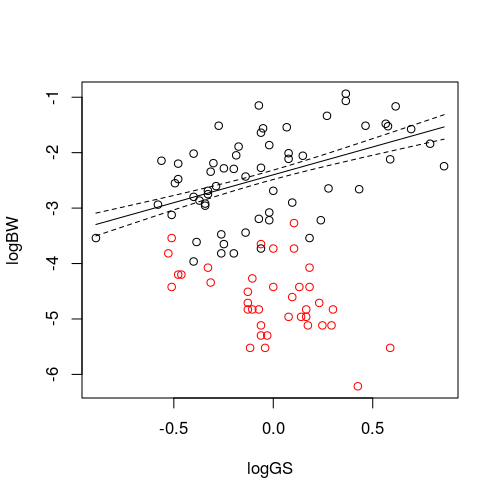

In [18]:
# plot the scatterplot of the data
plot(logBW ~ logGS, data = odonata, col = Suborder)
# add the predicted lines
lines(AnisoPred$fit ~ LogGSForFitting, col = "black")
lines(AnisoPred$fit + AnisoPred$se.fit ~ LogGSForFitting, col = "black", lty = 2)
lines(AnisoPred$fit - AnisoPred$se.fit ~ LogGSForFitting, col = "black", lty = 2)

$\star$ Copy the prediction code into your script and run the plot above.

Copy and modify the last three lines to add the lines for the Zygoptera. Your final plot should look like this:

![image](./graphics/odonPlot.svg)

---

# Model simplification

## Introduction 

In biology, we often use statistics to compare competing hypotheses in order to work out the simplest explanation for some data. This often involves collecting several explanatory variables that describe different hypotheses and then fitting them together in a single model, and often including interactions between those variables.

In all likelihood, not all of these model *terms* will be important. If we remove unimportant terms, then the explanatory power of the model will get worse, but might not get significantly worse.

> *"It can scarcely be denied that the supreme goal of all theory is to make the irreducible basic elements as simple and as few as possible without having to surrender the adequate representation of a single datum of experience."* 
>
> &ndash; *Albert Einstein*

Or to paraphrase:

> *"Everything should be made as simple as possible, but no simpler."*

The approach we will look at is to start with a *maximal model* — the model that contains everything that might be important — and simplify it towards the *null model* — the
model that says that none of your variables are important. Hopefully, there is a point somewhere in between where you can't remove any further terms without making the model significantly worse: this is called the *minimum adequate model*.

![image](./graphics/minmodflow.png)

### Section aims

The main aim of this section[$^{[1]}$](#fn1) is to learn how to build and then simplify complex models by removing non-explanatory terms, to arrive at the *Minimum Adequate Model*.

### The process of model simplification

Model simplification is an iterative process. The flow diagram below shows how it works: at each stage you try and find an acceptable simplification. If successful, then you start again with the new simpler model and try and find a way to simplify this, until eventually, you can't find anything more to remove.

![image](./graphics/maxmodflow.png)

As always, we can use an $F$-test to compare two models and see if they have significantly different explanatory power (there are also other ways to do this, such as using the Akaike Information Criterion, but we will not cover this here). In this context, the main thing to remember is that significance of the $F$-test used to compare a model and its simplified counterpart is a *bad* thing — it means that we've removed a term from the fitted model that makes it *significantly* worse.

## An example 

We'll be using the mammal dataset for this practical, so once again:

$\star$ Make sure you have changed the working directory to your stats module `code` folder.

$\star$  Create a new blank script called `MyModelSimp.R`.

$\star$  Load the mammals data into a data frame called `mammals`:

In [1]:
mammals <- read.csv('../data/MammalData.csv')

In previous sections, we looked at how the categorical variables `GroundDwelling` and `TrophicLevel` predicted genome size in mammals. In this section, we will add in two more continuous variables: litter size and body mass. The first thing we will do is to log both variables and reduce the dataset to the rows for which all of these data are available:

In [2]:
#get logs of continuous variables
mammals$logLS <- log(mammals$LitterSize)
mammals$logCvalue <- log(mammals$meanCvalue)
mammals$logBM <- log(mammals$AdultBodyMass_g)

# reduce dataset to five key variables
mammals <- subset(mammals, select = c(logCvalue, logLS, logBM, 
TrophicLevel, GroundDwelling))

# remove the row with missing data
mammals <- na.omit(mammals)

$\star$ Copy the code above into your script and run it

Check that the data you end up with has this structure:

In [3]:
str(mammals)

'data.frame':	240 obs. of  5 variables:
 $ logCvalue     : num  0.94 1.322 1.381 1.545 0.888 ...
 $ logLS         : num  1.1 1.12 0 0 1.52 ...
 $ logBM         : num  10.83 4.87 11.46 10.86 3.23 ...
 $ TrophicLevel  : Factor w/ 3 levels "Carnivore","Herbivore",..: 1 2 2 2 3 3 3 2 2 3 ...
 $ GroundDwelling: Factor w/ 2 levels "No","Yes": 2 2 2 2 2 1 2 1 1 1 ...
 - attr(*, "na.action")=Class 'omit'  Named int [1:139] 2 4 7 9 10 11 14 15 20 21 ...
  .. ..- attr(*, "names")= chr [1:139] "2" "4" "7" "9" ...


## A Maximal model

First let's fit a model including all of these variables and all of the interactions:

In [4]:
model <- lm(formula = logCvalue ~ logLS * logBM * TrophicLevel * GroundDwelling, data = mammals)

$\star$ Add this model-fitting step in your script.

$\star$ Look at the output of `anova(model)` and `summary(model)`.

Scared? Don't be! There are a number of points to this exercise:

1.  These tables show exactly the kind of output you've seen before. Sure, there are lots of rows but each row is just asking whether a model term (`anova`) or a model coefficient (`summary`) is significant.

2.  Some of the rows are significant, others aren't: some of the model terms are not explanatory.

3.  The two tables show slightly different things - lots of stars for the `anova` table and only a few for the `summary` table.

4.  That last line in the `anova` table: `logLS:logBM:TrophicLevel:GroundDwelling`. This is an interaction of four variables capturing how the slope for litter size changes for different body masses for species in different trophic groups and which are arboreal or ground dwelling. Does this seem easy to understand?

The real lesson here is that it is easy to fit complicated models in R.

*Understanding and explaining them is a different matter*.

The temptation is always to start with the most complex possible model but this is rarely a good idea.

## A better maximal model

Instead of all possible interactions, we'll consider two-way interactions: how do pairs of variables affect each other?

There is a shortcut for this: `y ~ (a + b + c)^2` gets all two way combinations of the variables in the brackets, so is a quicker way of getting this model:

`y ~ a + b + c + a:b + a:c + b:c`

So let's use this to fit a simpler maximal model:

In [7]:
model <- lm(logCvalue ~ (logLS + logBM + TrophicLevel + GroundDwelling)^2, data = mammals)

The `anova` table for this model looks like this:

In [8]:
anova(model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
logLS,1,0.98923090,0.98923090,25.7218583,8.238435e-07
logBM,1,3.03170122,3.03170122,78.8299165,2.175874e-16
TrophicLevel,2,0.47787807,0.23893904,6.2128630,2.364061e-03
GroundDwelling,1,0.11043622,0.11043622,2.8715489,9.154164e-02
logLS:logBM,1,0.27482000,0.27482000,7.1458354,8.064321e-03
logLS:TrophicLevel,2,0.19062973,0.09531487,2.4783653,8.616764e-02
logLS:GroundDwelling,1,0.13645096,0.13645096,3.5479808,6.090771e-02
logBM:TrophicLevel,2,0.08736291,0.04368145,1.1357997,3.229995e-01
logBM:GroundDwelling,1,0.88303940,0.88303940,22.9606803,3.002337e-06
TrophicLevel:GroundDwelling,2,0.04461728,0.02230864,0.5800664,5.606962e-01


The first lines are the *main effects*, which are all significant or near significant. Then there are the six interactions. One of these is very significant: `logBM:GroundDwelling`,
which suggests that the slope of log C value with body mass differs between ground dwelling and non-ground dwelling species. The other interactions are non-significant although some are close.

$\star$ Run this model in your script.

$\star$ Look at the output of `anova(model)` and `summary(model)`.

$\star$ Generate and inspect the model diagnostic plots.

## Model simplification

Now let's simplify the model we fitted above. Model simplification is not as straightforward as just dropping terms. Each time you remove a term from a model, the model will change: the model will get worse, since some of the sums of squares are no longer explained, but the remaining variables may partly compensate for this loss of explanatory power. The main point is that if it gets only a little worse, its OK, as the tiny amount of additional variation explained by the term you removed is not really worth it. 

But how much is "tiny amount"? This is what we will learn now by using the $F$-test.   Again, remember: significance of the $F$-test used to compare a model and its simplified counterpart is a *bad* thing — it means that we've removed a term from the fitted model that makes the it *significantly* worse.

The first question is: *what terms can you remove from a model*? Obviously, you only want to remove non-significant terms, but there is another rule – you cannot remove a main effect or an interaction while those main effects or interactions are present in a more complex interaction. For example, in the model `y ~ a + b + c + a:b + a:c + b:c`, you cannot drop `c` without dropping both `a:c` and `b:c`.

The R function `drop.scope` tells you what you can drop from a model. Some examples:

In [9]:
drop.scope(model)

[1] "logLS:logBM"                 "logLS:TrophicLevel"         
[3] "logLS:GroundDwelling"        "logBM:TrophicLevel"         
[5] "logBM:GroundDwelling"        "TrophicLevel:GroundDwelling"

In [10]:
drop.scope(y ~ a + b + c + a:b)

[1] "c"   "a:b"

In [11]:
drop.scope(y ~ a + b + c + a:b + b:c + a:b:c)

[1] "a:b:c"

The last thing we need to do is work out how to remove a term from a model. We could type out the model again, but there is a shortcut using the function `update`:

In [13]:
# a simple model
f <- y ~ a + b + c + b:c

# remove b:c from the current model
update(f, . ~ . - b:c)

y ~ a + b + c

In [14]:
# model g as a response using the same explanatory variables.
update(f, g ~ .)

g ~ a + b + c + b:c

Yes, the syntax is weird. The function uses a model or a formula and then allows you to alter the current formula. The dots in the code `. ~ . ` mean 'use whatever is currently in the response or explanatory variables'. It gives a simple way of changing a model.

Now that you have learned the syntax, let's try model simplification with the mammals dataset. 

From the above `anova` and `drop.scope` output, we know that the interaction `TrophicLevel:GroundDwelling` is not significant and a valid term. So, let's remove this term:

In [17]:
model2 <- update(model, . ~ . - TrophicLevel:GroundDwelling)

And now use ANOVA to compare the two models:

In [18]:
anova(model, model2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
225,8.653222,NA,NA,NA,NA
227,8.697839,-2,-0.04461728,0.5800664,0.5606962


This tells us that `model2` is *not* significantly worse than `model`. That is, dropping that one interaction term did not result in much of a loss of predictability. 

Now let's look at this simplified model and see what else can be removed:

In [19]:
anova(model2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
logLS,1,0.98923090,0.98923090,25.817379,7.832839e-07
logBM,1,3.03170122,3.03170122,79.122659,1.869660e-16
TrophicLevel,2,0.47787807,0.23893904,6.235935,2.309662e-03
GroundDwelling,1,0.11043622,0.11043622,2.882213,9.093329e-02
logLS:logBM,1,0.27482000,0.27482000,7.172372,7.944702e-03
logLS:TrophicLevel,2,0.19062973,0.09531487,2.487569,8.537509e-02
logLS:GroundDwelling,1,0.13645096,0.13645096,3.561157,6.042258e-02
logBM:TrophicLevel,2,0.08736291,0.04368145,1.140018,3.216374e-01
logBM:GroundDwelling,1,0.88303940,0.88303940,23.045947,2.869667e-06
Residuals,227,8.69783936,0.03831647,NA,NA


In [20]:
drop.scope(model2)

[1] "logLS:logBM"          "logLS:TrophicLevel"   "logLS:GroundDwelling"
[4] "logBM:TrophicLevel"   "logBM:GroundDwelling"

$\star$ Add this first simplification to your script and re-run it.

$\star$  Look at the output above and decide what is the next possible term to delete

$\star$ Using the code above as a model, create `model3` as the next simplification. (remember to use `model2` in your `update` call and not `model`).

## Exercise

Now for a more difficult exercise: 

$\star$ Using the code above to guide you, try and find a minimal adequate model that you are happy with. In each step, the output of `anova(model, modelN)` should be non-significant (where $N$ is the current step).

It can be important to consider both `anova` and `summary` tables. It can be worth trying to remove things that look significant in one table but not the other — some terms can explain significant variation on the `anova` table but the coefficients are not significant.

Remember to remove *terms*: with categorical variables, several coefficients in the `summary` table may come from one term in the model and have to be removed together.

When you have got your final model, save the model as an R data file: `save(modelN, file='myFinalModel.Rda')`.

-----

<a id="fn1"></a>
[1]: Here you work with the script file `ModelSimp.R`

# Generalised Linear Models

## Introduction 

Aims of this lesson:

* Develop an intuitive understanding of generalized linear models 

* Learn to fit generalized linear models to count data

This section will step through the analysis carefully. These are not simple analyses so you should concentrate on understanding the process and the biology and think about how to present your results.

## What is a GLM?

Till now, we have adhered faithfully to the assumption of a normal (Gaussian) distribution for the response variable, at times transforming the response variable (e.g., by taking a log) to make it (approximately) normal. However, there are many scenarios where assuming a normal distribution for the response variable is just not appropriate, whether you transform it or not. The generalized linear model (GLM) analysis is (as the name suggests) a generalization of the ordinary linear regression model analysis to accommodate response variables that have non-normal error distributions. These types of (non-normal) response variables can arise quite commonly in the form of count (as in the practical example below) and binary response (present/absent, 0/1, etc.) data, but beyond that, many measures of interest in biology are just not normally distributed.

The GLM generalization of the ordinary Linear Models is made possible by using an (arbitrary) function of the dependent variable (the link function) that makes it vary *linearly* with the predicted values, thus making the problem relatively tractable statistically. We will not try to understand the mathematical underpinnings of this approach here, but instead learn through an example. 


## Some (statistical) distributions

First, it's time to revisit the idea of *statistical distributions*. This is because while analyzing data using GLMs, one needs to decide what particular statistical distribution best represents (or captures, or "model's") that particular dataset. For example, continuous numeric data are *often* normally distributed (e.g., weights of lecturers!). On the other hand, count data are likely to be distributed according to the Poisson distribution (e.g., numbers of plant species found in a sampling plot). And all statistical distribution are actually a *family* of distributions of different shapes (e.g., can range from right-skewed to bell-shaped) and/or scales (spread) depending upon the value of their *parameters*. For example, the Gaussian distribution can have different scales depending on the variance parameter. More on distribution parameters below.   

There are actually a large number of statistical distributions [out there](https://en.wikipedia.org/wiki/List_of_probability_distributions) to choose from. But we will look at a few that GLMs support. Specifically, the `glm` procedure in R supports the following distribution "families": Binomial, Gaussian, Gamma, Inverse Gaussian, Poisson, Quasi, Quasi-Binomial, and Quasi-Poisson. You may want to look these up online (google it). Let's look at three other distributions that are particularly useful in R. 

### The Poisson distribution

The Poisson distribution family is appropriate for discrete, integer valued data. You can generate "data" that are poisson-distributed by using the function `rpois(n, lambda)` in R:

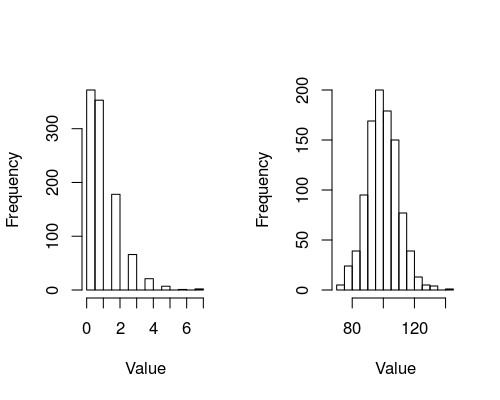

In [6]:
par(mfrow=c(1,2)) 
hist(rpois(1000, lambda = 1),xlab = "Value", main="")
hist(rpois(1000, lambda = 100),xlab = "Value", main="")

The main things to note about these plots (and poisson-distributed data): 

* This distribution is appropriate for response data that can only take integer values, such as counts (technically, only for values of $\lambda \ge 1$, but this does not really concern you as far fitting glms in R is concerned).
* A single parameter $\lambda$ ("lambda") controls the shape, the scale (the range of the variable) and the location (mean value, or central tendency) of the distribution.
* Thus, this distribution can represent a variety of shapes that count data can take, from right skewed (left plot) to bell-shaped (right plot)  &ndash; these variants of shapes and scales make up the Poisson distribution "family".

$\star$ Play with the above code and generate different shapes (and inevitably, scales) of poisson-distributed data.

### The Binomial distribution

The binomial distribution is appropriate for continuous-valued data that arise from repeated trials of binary (yes/no, 0/1, head/tail, suceptible/resistant) outcomes. This distribution is also the basis for the [binomial statistical test](https://en.wikipedia.org/wiki/Binomial_test). You can generate  binomial-distributed "data" by using the function `rbinom(n, size, prob)` in R:

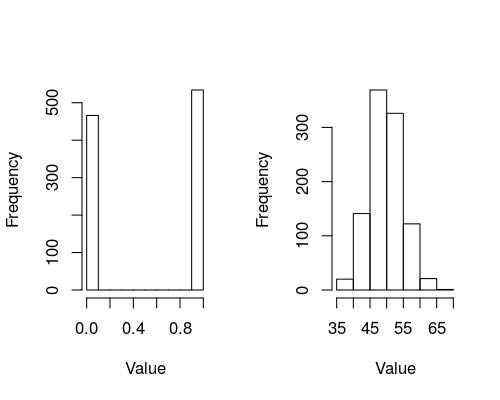

In [7]:
par(mfrow=c(1,2)) 
hist(rbinom(1000, 1, 0.5),xlab = "Value", main="")
hist(rbinom(1000, 100, 0.5),xlab = "Value", main="")

The main things to note about these plots (and Binomial-distributed data):

* The two main parameters of interest are `size` (number of trials), and `prob` (the probability of an outcome in each trial). So, 
  * The left plot is the distribution of outcomes of a single try of a 50:50 (0.5 probability, like a coin-flip) outcome, re-generated 1000 times (e.g., a thousand coin flips) &ndash; as expected, there are about 500 each of 0's and 1's (e.g., 0 = head, 1 = tail). Each of the 1000 such success/failure experiments is called a Bernoulli trial/experiment. For repeated experiments of a single trial, i.e., `size` = 1 in the R code above, the binomial distribution is a Bernoulli distribution (so the left plot is a bernoulli distribution). 
  * The right plot is the binomial distribution that you will encounter more often, which is appropriate for modeling the number of successes in a sample of a given size. In the above code, `size` = 100, with 1000 repetitions of this "experiment"). Thus in the right plot, the distribution will on average have a mean value of 50 ($0.5\times100$ trials) (recall the [Central Limit Theorem](12-ExpDesign.ipynb#Data-types-and-distributions)).
* Thus, the binomial distribution family is appropriate for binomial [logistic regression](https://en.wikipedia.org/wiki/Logistic_regression), which is a GLM analysis where your sample of binary (yes/no, 0/1, etc) outcomes is fitted as a function of one or more continuous or categorical predictors.

$\star$ Play with the above code and generate variants of binomial-distributed data distributions. They will all be bell-shaped, but can take different mean and spread values.


### The Gamma distribution

The Gamma family is suitable for data that are continuous and can only take values greater than zero (positive values). Another key feature of this distribution family is that the ratio of its variance and mean is constant, so it is appropriate to model data where increasing a mean value also increases the variance as a fixed (constant) factor.  Because of this property, the Gamma family is often used to fit a GLM to response variables that are times, such as waiting time, time between failure, or inverse of the rate of any event, such as an accident.

You can generate  Gamma-distributed "data" by using the function `rgamma(n, shape, rate)` in R:

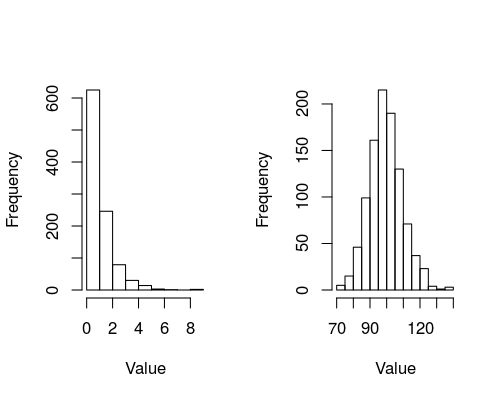

In [8]:
par(mfrow=c(1,2)) 
hist(rgamma(1000,1,1),xlab = "Value", main = "")
hist(rgamma(1000,100,1),xlab = "Value", main = "")

The main things to note about these plots (and Gamma-distributed data):
* The main parameters of interest are the `shape` and `rate`. The latter controls the distribution's scale (over what values the distributions spreads).
* This distribution can be right-skewed or bell-shaped, depending on choice of the `shape` parameter.

$\star$ Play with the above code and generate variants in the gamma-distributed data family.

### Other distributions

There are also the Quasi-binomial and Quasi-poisson families within R's `glm` procedure, which differ from the Binomial and Poisson families in that the dispersion parameter (variance to mean ratio) is not fixed at one, so that over-dispersion in your data (greater variability than would be expected based on the given statistical model) can be modeled. You will see an example of this below. 

Thus, the first and key step while using GLMs is to determine what type of distribution best describes your response variable. We will now try put this and subsequent steps of fitting GLMs.  

## A GLM example

We will use mutation data collected in the Genetics Practical by a previous year's batch. 

The students were basically counting colonies looking for mutations. There were a number of bacterial strains which were different mutants of *Salmonella*. Each group applied a mutagen Nitroguanisine (NG) as well as histidine and streptomycine. A control plate was also tested.

The data file is called `PracData.csv` (so it's a comma-separated values file), and is available from VectorBiTEs  `data` directory.

$\star$ Save the `PracData.csv` dataset into your `data` directory.

$\star$ Create a new script called MyGLM.R in your `code` directory. Use the code below to load and check your data.

$\star$ Start R and change the working directory to `code`, and read in the data:

In [9]:
colonies <- read.csv("../data/PracData.csv")
str(colonies)
head(colonies)

'data.frame':	680 obs. of  5 variables:
 $ Student.ID : Factor w/ 34 levels "A1","A10","A11",..: 1 1 1 2 2 2 4 4 4 4 ...
 $ Strain     : Factor w/ 5 levels "421","712","881",..: 4 3 5 1 2 3 4 2 3 5 ...
 $ Treatment  : Factor w/ 4 levels "Control","His",..: 1 1 1 3 3 1 1 3 3 1 ...
 $ ColonyCount: int  0 0 0 0 0 0 0 0 0 0 ...
 $ HaloLawn   : Factor w/ 2 levels "N","Y": NA NA NA NA NA NA NA NA NA NA ...


Student.ID,Strain,Treatment,ColonyCount,HaloLawn
A1,899,Control,0,NA
A1,881,Control,0,NA
A1,TA102,Control,0,NA
A10,421,NG,0,NA
A10,712,NG,0,NA
A10,881,Control,0,NA


Now let's explore the data first.

### Data exploration

We have a continuous response variable (`ColonyCount`) and two categorical explanatory variables (`Strain` and `Treatment`). We also have observations of halos and bacterial lawns around the treated areas (`HaloLawn`), which we will come back to at the end of this section.

So, with two factors as the explanatory variables, we will use box and whisker plots and boxplots to explore the data. First, we'll look at the effects of the four treatments.

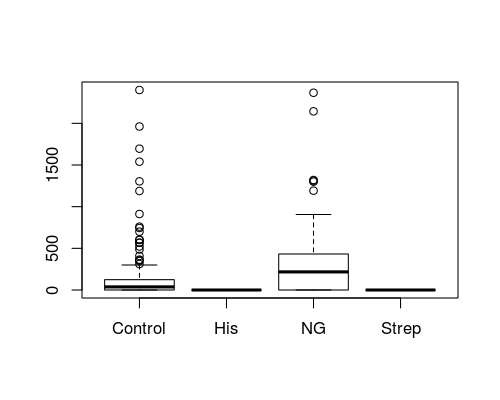

In [10]:
boxplot(ColonyCount ~ Treatment, data=colonies)

There are two immediate things to note.

(1) The distributions of colony counts are very *skewed* — many small counts and a few large counts. We've already seen that taking a log of data sometimes works in these cases. However, as the tables above show, we have zero counts for all treatments and $\log(0)$ is undefined. A common trick is therefore to use $\log(n+1)$ (add 1 and take a log) when dealing with count data like this:

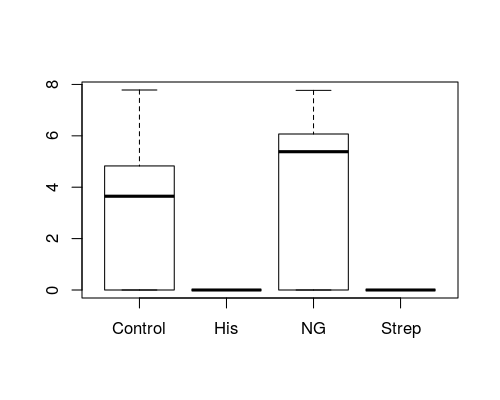

In [11]:
colonies$logCC <- log(colonies$ColonyCount + 1)
boxplot(logCC ~ Treatment, data=colonies)

I hope you'll agree that this still doesn't look very convincingly like normal data, but we'll come back to this point.

(2)  The colony counts are vastly different between the different treatments. It is hard to say for sure from the two plots, but it looks like colonies never grow under the histidine and streptomycine treatments. We can check that:

In [12]:
tapply(colonies$ColonyCount, colonies$Treatment, min, na.rm = TRUE)

Control     His      NG   Strep 
      0       0       0       0

In [13]:
tapply(colonies$ColonyCount, colonies$Treatment, max, na.rm = TRUE)

Control     His      NG   Strep 
   2400       0    2367       0

There is indeed no variation at all in colony count for histidine and streptomycine — colonies never grow in these treatments. We don't really need statistics for this observation and, in fact, variation is needed for statistics to work. So, for the rest of this analysis, we will reduce the dataset to the control and nitroguanisine treatments.

$\star$ Update your script by including the code for these plots.

We'll use a new piece of code here to get the right subset. `var %in% c('a','b','c')` finds all the entries in `var` whose values are equal to `'a'`, `'b'` OR `'c'`.

This is new syntax, so let's make sure we understand it. For example, try the following:

In [14]:
MyData1 <- rep(c("Control", "NG", "NG"), 4)
MyData1

[1] "Control" "NG"      "NG"      "Control" "NG"      "NG"      "Control"
 [8] "NG"      "NG"      "Control" "NG"      "NG"

In [15]:
MyData1 %in% c("Control", "NG")

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

This is the same as doing:

In [16]:
 MyData1 == "Control" |  MyData1 == "NG"

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

Note that this is NOT the same as doing:

In [17]:
MyData1 == c("Control", "NG")

[1]  TRUE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE

This is because concatenating the variable names `"Control"` and  `"NG"` using `c()` forces R to match only pairs in that sequence, and not just that, but also only search in successive blocks of two entries. That is why above, the sub-sequence `'Control' 'NG' 'NG' 'Control' 'NG'` still returns `TRUE TRUE FALSE FALSE FALSE`, as the second occurrence of the pair `'Control' 'NG'` comes in an odd location, following a single `'NG'`.  

Now, let's do the subsetting using `%in%`: 

In [18]:
coloniesCN <- subset(colonies, Treatment %in% c("Control", "NG"))
str(colonies)

'data.frame':	680 obs. of  6 variables:
 $ Student.ID : Factor w/ 34 levels "A1","A10","A11",..: 1 1 1 2 2 2 4 4 4 4 ...
 $ Strain     : Factor w/ 5 levels "421","712","881",..: 4 3 5 1 2 3 4 2 3 5 ...
 $ Treatment  : Factor w/ 4 levels "Control","His",..: 1 1 1 3 3 1 1 3 3 1 ...
 $ ColonyCount: int  0 0 0 0 0 0 0 0 0 0 ...
 $ HaloLawn   : Factor w/ 2 levels "N","Y": NA NA NA NA NA NA NA NA NA NA ...
 $ logCC      : num  0 0 0 0 0 0 0 0 0 0 ...


Note that this is the same as doing:

In [19]:
coloniesCN <- subset(colonies, Treatment == "Control" | Treatment == "NG")
str(coloniesCN)

'data.frame':	340 obs. of  6 variables:
 $ Student.ID : Factor w/ 34 levels "A1","A10","A11",..: 1 1 1 2 2 2 4 4 4 4 ...
 $ Strain     : Factor w/ 5 levels "421","712","881",..: 4 3 5 1 2 3 4 2 3 5 ...
 $ Treatment  : Factor w/ 4 levels "Control","His",..: 1 1 1 3 3 1 1 3 3 1 ...
 $ ColonyCount: int  0 0 0 0 0 0 0 0 0 0 ...
 $ HaloLawn   : Factor w/ 2 levels "N","Y": NA NA NA NA NA NA NA NA NA NA ...
 $ logCC      : num  0 0 0 0 0 0 0 0 0 0 ...


You'll see that, although we have removed two treatments, their names still appear in the list of levels in the `str` output. R retains a list of all the levels that were originally in a factor, even when those levels aren't used any more. This will be annoying later, so
we'll use the `droplevels` function to strip them out.

In [20]:
coloniesCN <- droplevels(coloniesCN)
str(coloniesCN)

'data.frame':	340 obs. of  6 variables:
 $ Student.ID : Factor w/ 34 levels "A1","A10","A11",..: 1 1 1 2 2 2 4 4 4 4 ...
 $ Strain     : Factor w/ 5 levels "421","712","881",..: 4 3 5 1 2 3 4 2 3 5 ...
 $ Treatment  : Factor w/ 2 levels "Control","NG": 1 1 1 2 2 1 1 2 2 1 ...
 $ ColonyCount: int  0 0 0 0 0 0 0 0 0 0 ...
 $ HaloLawn   : Factor w/ 0 levels: NA NA NA NA NA NA NA NA NA NA ...
 $ logCC      : num  0 0 0 0 0 0 0 0 0 0 ...


$\star$ Add these commands for sub-setting your data to your script file.

## Looking at strains too

Now we'll look to see how counts differ between the strains. A simple way to visualise this is to use the `lattice` package again to get plots grouped by treatment.

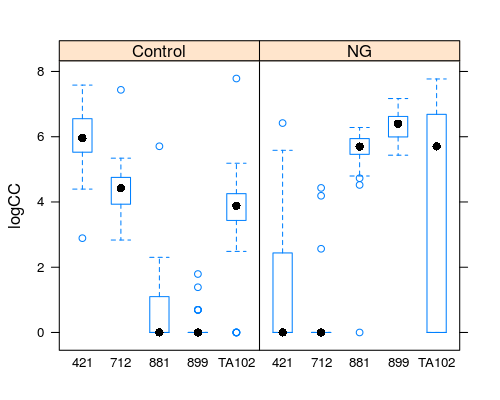

In [21]:
library(lattice)

bwplot(logCC ~ Strain | Treatment, data=coloniesCN)

First impressions from this figure:

1. The strains are doing *very* different things under the two treatments. Hopefully this now leaps out at you as suggesting that the two variables (Strain and Treatment) are *interacting*.

2. The distributions are still pretty ugly — the variances differ hugely between combinations and four combinations have a median of zero.

We can also use a barplot of means here. We'll use the original data to get the means, but can use a log scale on the $y$ axis (`log = 'y'`). 

Let's do it:

In [22]:
tab <- tapply(coloniesCN$ColonyCount, list(coloniesCN$Treatment, coloniesCN$Strain), mean, na.rm=TRUE)

print(tab)

              421        712       881     899    TA102
Control 538.20000 138.866667  12.73077   0.375 126.6875
NG       61.28571   5.517241 292.71429 593.000 523.9000


And then,

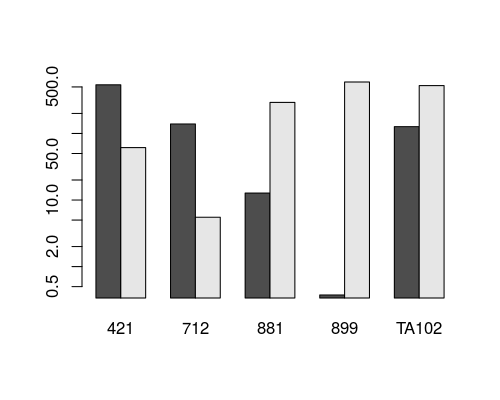

In [23]:
barplot(tab, beside=TRUE, log= 'y' )    

Let's have a go at fitting an ordinary Linear model.

## A linear model

We'll fit a model of colony count as the interaction between strain and treatment and then look at the diagnostic plots. We'd do this anyway, but we're already suspicious about the variance.

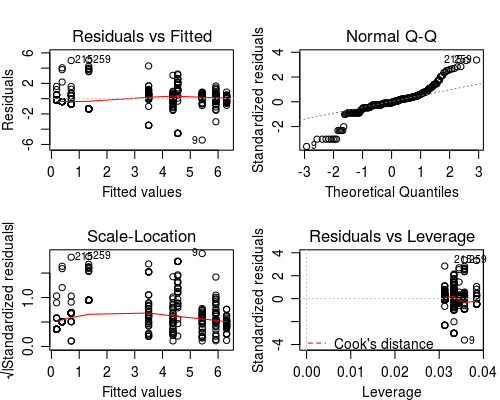

In [24]:
modLM <- lm(logCC ~ Strain * Treatment, data=coloniesCN)
par(mfrow=c(2,2), mar=c(3,3,3,1), mgp=c(2,0.8,0))
plot(modLM)

$\star$ Include Run this code and have a close look at the plots.

That normal Q-Q plot is not good. Our suspicions were justified and it doesn't look like we can use a simple log transformation. We're not even going to look at the `anova` and `summary` tables — if the diagnostic plots are bad enough, then the model outputs are not
to be trusted.

## Fitting a GLM

In the linear models lecture, we looked at the expectation of *constant normal variance* in linear models. Whatever the combination of explanatory variables for a particular prediction, the residuals around that prediction have similar variance and are roughly normally distributed. The panel on the left shows this basic idea.

![image](./graphics/GLMexample.svg)
<small> <center> Illustration of continuous data that follow a normal distribution (left) versus discerete, count data (right). </center></small>

As we have seem, count data does not have this distribution, even when logged. The panel on the right shows the expected distribution of count data as the mean count increases with an explanatory variable. There are three key differences between the two panels:

1.  Counts can *never* be negative but can be zero.

2.  Counts are always *integers* — whole numbers — rather than being continuous.

3.  The variance of count data is *not constant*. As the average predicted count gets larger, so does the variance. Unlike the normal distribution, where variance can take any value, for count data the variance is expected to be equal to the mean.

So, we have data that is unsuitable for a linear model because it doesn't show constant normal variance. This is where generalised linear models come in — we can change the model for the expected residuals to use a different distribution. For count data, this is the
*Poisson* distribution.

We need to change the function we use to fit models to `glm`, but otherwise the process is very similar. The whole point of the GLM is to model the original count data more appropriately, so we will abandon the logged data too. GLMs can cope with a range of different distributions, so we have to specify the `family` of the distribution we want to use.

So let's fit a GLM to the data:

In [25]:
modPois <- glm(ColonyCount ~ Strain * Treatment, data=coloniesCN, family= 'poisson')

First, we'll look at the summary table for this model. We have 5 levels of strain and 2 levels of factor in the subset so we get an intercept ($i$), 4 differences for strains($s_{2-5}$), one difference for treatment ($t_2$) and then four differences for the interaction ($s_{2-5}t_2$). These combine like this:

$$\begin{array}{|l|c|c|}
\hline
                            & \textrm{Control} & \textrm{Nitroguanisine} \\
\hline
\textrm{421}   & i        & i+t_2              \\
\textrm{712}   & i + s_2  & i+s_2+t_2+ s_2t_2  \\
\textrm{881}   & i + s_3  & i+s_3+t_2 + s_3t_2  \\
\textrm{889}   & i + s_4  & i+s_4+t_2 + s_4t_2  \\
\textrm{TA102} & i + s_5  & i+s_5+t_2  + s_5t_2 \\
\hline
\end{array}$$

The summary table looks like this:

In [26]:
summary(modPois)


Call:
glm(formula = ColonyCount ~ Strain * Treatment, family = "poisson", 
    data = coloniesCN)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-32.370  -10.326   -3.322    0.844   97.840  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)              6.28823    0.00787  799.03   <2e-16 ***
Strain712               -1.35472    0.01738  -77.96   <2e-16 ***
Strain881               -3.74421    0.05549  -67.47   <2e-16 ***
Strain899               -7.26906    0.28878  -25.17   <2e-16 ***
StrainTA102             -1.44651    0.01757  -82.34   <2e-16 ***
TreatmentNG             -2.17268    0.02539  -85.57   <2e-16 ***
Strain712:TreatmentNG   -1.05295    0.08446  -12.47   <2e-16 ***
Strain881:TreatmentNG    5.30786    0.06152   86.28   <2e-16 ***
Strain899:TreatmentNG    9.53871    0.28989   32.91   <2e-16 ***
StrainTA102:TreatmentNG  3.59226    0.03090  116.24   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 

This looks similar to the `summary` table for a linear model, but with some differences. 

Let's Interpret this table: 
* Under the control treatment, strain 421 (the intercept) has the highest number of colonies and all the other strains have lower numbers to some degree — the differences are
negative. 
* The overall effect of nitrogaunasine is to decrease the number of colonies — again a negative coefficient — but then the positive interactions show big increases in colony counts for nitroguanisine for specific strains. Everything is hugely significant.
* Two types of deviance are in the model output. Deviance is a measure of goodness of fit of a GLM. The null deviance shows how well the response variable is predicted by a model that includes only the intercept (overall mean). In our example, we have a value of 134445 on 293 degrees of freedom. Including the independent variables (strain and treatment) decreased the deviance to 61579 points on 284 degrees of freedom (remember, lust like linear models, the df are decreased by the number of parameters minus 1). This is a significant reduction in deviance, so the model fit is significant.

$\star$ Copy the code in this section into your script and explore the model a bit more.

### Overdispersion

There's a problem. You may have already spotted it:

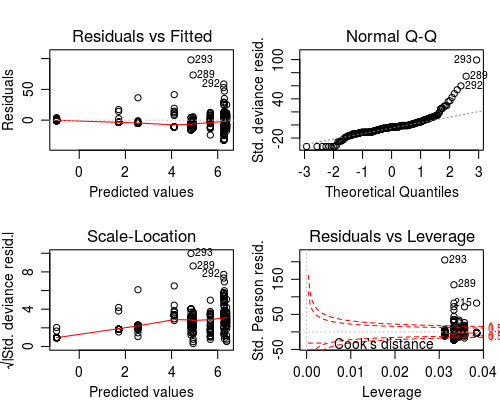

In [27]:
par(mfrow = c(2, 2), mar = c(3, 3, 3, 1), mgp = c(2, 0.8, 0))
plot(modPois)

Actually, there are two problems. First, that Q-Q plot is still a bit dubious. More of the points are close to the line than in the linear model but there are some extreme positive residuals. Second, the magnitude of the residuals is enormous, and this is really clear in the plot in the bottom right hand corner. This plot identifies outliers and any points outside of the red dotted line are possible problems.

The problem here is *overdispersion*. The Poisson distribution predicts that the variance at a point in the model is equal to the prediction — the mean count at that point. Our count data shows much more variance than this — particularly that there are some huge counts given the means.

There is a simple way to check the dispersion of count data using the `summary` table: the ratio of the residual deviance to the residual degrees of freedom should be approximately 1. This expectation is actually given in the table:

`(Dispersion parameter for poisson family taken to be 1)`

In this case, the ratio is $61579/284=216.8$. That's very strongly overdispersed. Fortunately, we can allow for this by using a different model.

### Fitting a GLM using a quasi-poisson distribution

The quasi-poisson distribution family uses the data to estimate the dispersion of the model, but is otherwise very similar to using the Poisson family. Let's re-fit the GLM using this distribution. 

In [28]:
modQPois <- glm(ColonyCount ~ Strain * Treatment, data = coloniesCN, family = 'quasipoisson')

The summary table now looks like this:

In [29]:
summary(modQPois)


Call:
glm(formula = ColonyCount ~ Strain * Treatment, family = "quasipoisson", 
    data = coloniesCN)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-32.370  -10.326   -3.322    0.844   97.840  

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)               6.2882     0.1581  39.784  < 2e-16 ***
Strain712                -1.3547     0.3490  -3.882 0.000129 ***
Strain881                -3.7442     1.1145  -3.359 0.000888 ***
Strain899                -7.2691     5.8000  -1.253 0.211130    
StrainTA102              -1.4465     0.3528  -4.100 5.40e-05 ***
TreatmentNG              -2.1727     0.5100  -4.261 2.78e-05 ***
Strain712:TreatmentNG    -1.0530     1.6964  -0.621 0.535287    
Strain881:TreatmentNG     5.3079     1.2355   4.296 2.39e-05 ***
Strain899:TreatmentNG     9.5387     5.8222   1.638 0.102460    
StrainTA102:TreatmentNG   3.5923     0.6207   5.788 1.88e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05

This is pretty similar to the previous table but there are two differences. First, the dispersion parameter line has changed. Second, all the $p$ values have got less significant – this is the effect of controlling for the overdispersion.

Let's look at the model diagnostic plots next:

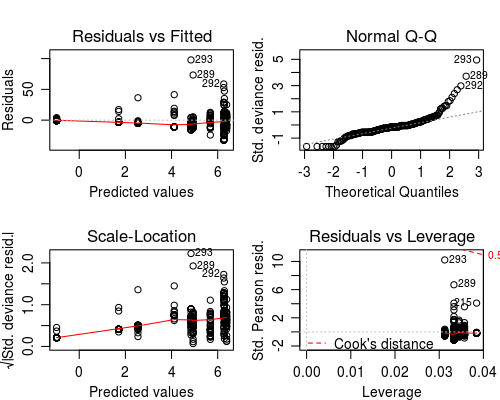

In [30]:
par(mfrow = c(2, 2), mar = c(3, 3, 3, 1), mgp = c(2, 0.8, 0))
plot(modQPois)    

The residuals and leverage plot is now ok. The Q-Q plot is not better, but is still an improvement over the original linear model. We can't improve the model fit any more — it isn't perfect but we'll accept those imperfections. It is worth thinking about the imperfections though — what might give rise to occasional larger than expected counts of
colonies?

We'll look at the `anova` table next. Technically, this is now analysis of deviance not analysis of variance but the concept is the same. Different tests are appropriate for different families of distribution, but we can use $F$ here:

In [39]:
anova(modQPois, test = "F")

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
NULL,NA,NA,293,134444.90,NA,NA
Strain,4,13923.431,289,120521.47,8.629323,1.383092e-06
Treatment,1,6054.662,288,114466.81,15.009988,1.328328e-04
Strain:Treatment,4,52887.715,284,61579.09,32.778214,1.790403e-22


Can we simplify the model? The interaction is the only term we can drop and looks highly significant, but we can check by deleting it.

In [40]:
drop.scope(modQPois)

[1] "Strain:Treatment"

In [43]:
modQPois2 <- update(modQPois, . ~ . - Strain:Treatment)
anova(modQPois, modQPois2, test = "F")

Resid. Df,Resid. Dev,Df,Deviance,F,Pr(>F)
284,61579.09,NA,NA,NA,NA
288,114466.81,-4,-52887.72,32.77821,1.790403e-22


No, that makes the model much worse, so we now have our final model.

$\star$ Include this new model fitting in your script and check you've got the same results.

### Model predictions

We can get model predictions and standard errors using the `predict` function. There is a difference though. GLMs use an internal transformation to model the data using a *link function* and the coefficients in the summary above are on the scale of the link transformation. The link function defines the relationship between the linear predictor and the mean of the distribution function, so that an otherwise non-linear (non-normal) response can be accommodated. For quasipoisson, the default is a *log link*, which you can see in the output of `anova`. You can use `predict` to get predictions on the scale of the original *response*. You can use different link functions than the "canonical" one encoded for each distribution `family`, but covering this is outside the scope of this section. 

In [56]:
# use expand.grid to get all combinations of factors
df <- expand.grid(Strain = levels(coloniesCN$Strain), Treatment = levels(coloniesCN$Treatment))

predict(modQPois, newdata = df, type = "response")

1          2          3          4          5          6          7 
538.200000 138.866667  12.730778   0.375000 126.687500  61.285714   5.517241 
         8          9         10 
292.714286 593.000000 523.900000

Those are the same values as the means we calculated for the barplot. Adding standard errors to barplots is more difficult for GLMs and we won't go into it here.

### Reporting the model

Reporting complicated statistics is a difficult business. There is a lot of detail involved and you want the reader to understand what you have done well enough to repeat the analysis if needed. You also have to summarise and explain the results without pages of R output.

Here are some pointers:

- What does the data show? Present a graph or a table to show the data you are about to model. *Always* include a figure or table legend and *always* refer to that figure or legend from the text.

- Have you transformed the data or used a subset? If so, why?

- What kind of model or statistical test have you used?

- With linear models, what is the response variable and what are the explanatory variables.

- Have you simplified the model and, if so, what was the most complex model you tried?

- How did you check the suitability of the model? Are there any problems with the model and, if so, what might cause them?

- If you summarise stats in text, you must include all the information about the test.
    - For $F$ tests, this is $F$, the two degrees of freedom and the p value. For example: 'There is a significant interaction between treatment and strain ($F_{4,284}=32.7, p < 0.0001$)'.
    - For $t$ tests, this is the coefficient, the standard error, $t$, the degrees of freedom and $p$. For example, 'Across strains, the main effect of nitroguanisine is to reduce colony counts relative to the control (estimate=-2.17, s.e= 0.51, $t=-4.26$, df=284, $p < 0.0001$)'.
    
- With more complex models, it is common to present either the anova table or the coefficients table as a summary of the model output. Just include the tables from R output, not the information around it. See Table 1 for an example.

- *Never* just include chunks of raw output from R.

- Most importantly, you need to convey what the interpretation of the model is. What is it telling you about the data?

*Table 1*: Coefficients from a GLM of treatment and strain as predictors of colony count.

||Estimate|   Std. Error|   t value |p |
|-:|:-|:-|:-|                
|(Intercept)|       6.29|         0.16|     39.78 |<0.0001|
|Strain712|-1.35 | 0.35|-3.88|0.0001|
|Strain881|      -3.74|         1.11|     -3.36| 0.0009|
|                  Strain899|      -7.27|         5.80|     -1.25| 0.2111|
|                StrainTA102|      -1.45|         0.35|     -4.10 |<0.0001|
|                TreatmentNG|      -2.17|         0.51|     -4.26| <0.0001|
|      Strain712:TreatmentNG|      -1.05|         1.70|     -0.62| 0.5353|
|      Strain881:TreatmentNG|       5.31|         1.24|      4.30| &lt;0.0001|
|Strain899:TreatmentNG|       9.54|         5.82|      1.64| 0.1025|
|    StrainTA102:TreatmentNG|       3.59|         0.62|      5.79| &lt;0.0001|
    

Halos and lawns
---------------

We'll keep this one simple since it is harder to analyse. The response variable (`HaloLawn`) is binary — the plates either have a lawn or not. We'll just look at a contingency table of how many plates have halos or lawns under each combination of treatment and strain.

In [57]:
table(Halo = colonies$HaloLawn, Strain = colonies$Strain, Treatment =  colonies$Treatment)

, , Treatment = Control

    Strain
Halo 421 712 881 899 TA102
   N   0   0   0   0     0
   Y   0   0   0   0     0

, , Treatment = His

    Strain
Halo 421 712 881 899 TA102
   N   1   1   0   0     1
   Y  29  29  26  32    31

, , Treatment = NG

    Strain
Halo 421 712 881 899 TA102
   N   0   0   0   0     0
   Y   0   0   0   0     0

, , Treatment = Strep

    Strain
Halo 421 712 881 899 TA102
   N   5  30   5  21     0
   Y  25   0  25   9    32


So, lawns and halos are never recorded from nitroguanisine or the control. They're nearly always found with histidine and different strains have different response to streptomysin. Again, treatment and strain interact. Although you can use a $\chi^2$ test with two-dimensional contingency tables to look for independence between factors, you can't with a three-way table without using more specialized tests. 

We will not go any further into this, but be aware that such gnarly statistical challenges may arise at times!  

# Practice Problem for Linear Models
## Take data from Huxley et al. and use to develop a hypothesis and use a model to test the hypothesis; make sure your model fits properly to the data and provide statistical support.
The data can be found at `traitdata_Huxleyetal_2021.csv`. This is very open ended so have fun with it!